In [1]:
import pickle
import pandas as pd
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt 
import cvxpy as cp 
import sys 
import os.path
import warnings
warnings.filterwarnings('ignore') 
import seaborn as sb

from networkx.algorithms.centrality import degree_centrality, betweenness_centrality, closeness_centrality

from empyrial import *

In [4]:
edge_list = pd.read_csv('edges.csv')
g = nx.from_pandas_edgelist(edge_list, edge_list.columns[0], edge_list.columns[1])

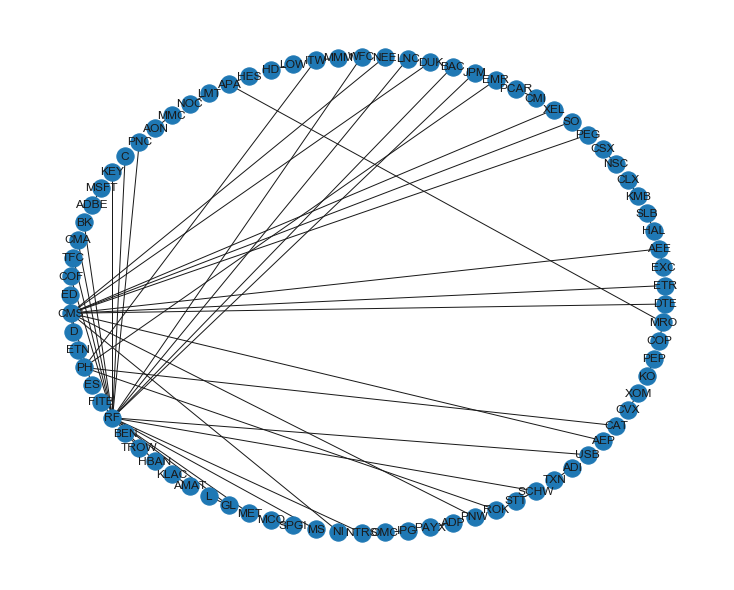

In [6]:
plt.figure(figsize=(10, 8))
nx.draw_shell(g, with_labels=True)

In [8]:
import pickle5 as pickle
with open('Data/sp500Ticker.pickle', "rb") as fh:
  tickers = pickle.load(fh)
len(tickers)

505

In [9]:
modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
temp = 'Data/Stocks/sp500/' + tickers[0] + '.csv'
datapath = os.path.join(modpath, temp)
data = pd.read_csv(temp, index_col='Date', parse_dates=True)
stock_df = pd.DataFrame()
stock_df[tickers[0]] = data['Close']

for i in range(1, len(tickers)):
    try:
        temp = 'Data/Stocks/sp500/' + tickers[i] + '.csv'
        datapath = os.path.join(modpath, temp)
        data = pd.read_csv(temp, index_col='Date', parse_dates=True)
        stock_df[tickers[i]] = data['Close']
    except:
        print(tickers[i])


ALXN
BRK.B
BF.B
COG
CARR
LB
MXIM
OGN
OTIS


In [10]:
count = 0
for column in stock_df.columns:
    if stock_df[column].isnull().sum() > 0:
        stock_df.drop(column, axis=1, inplace=True)
        count += 1
        print(column)
print(count)
    

ABBV
ALLE
ANET
CZR
CTLT
CDW
CFG
CTVA
DOW
ETSY
FTV
FOXA
FOX
HPE
HLT
HWM
INFO
IR
IQV
KEYS
KHC
LW
NWSA
NWS
NCLH
PAYC
PYPL
QRVO
SYF
TWTR
UA
WRK
ZTS
33


In [11]:
def calc_Mu(df):
    mu = df.mean() * 252
    return mu

def calc_sigma(df):
    sigma = df.cov() * 252
    sigma = sigma.values
    return sigma
    
def calc_delta(df):
    delta = np.full((len(df.columns), 1), 0.02)
    delta[len(df.columns)-1] = 0.005
    return delta 

In [12]:
def calc_Mu(df):
    mu = df.mean() * 252
    return mu

def calc_sigma(df):
    sigma = df.cov() * 252
    sigma = sigma.values
    return sigma
    
def calc_delta(df):
    delta = np.full((len(df.columns), 1), 0.02)
    delta[len(df.columns)-1] = 0.005
    return delta 

In [13]:
returns = np.log(stock_df/stock_df.shift(1))
returns.dropna(inplace=True)

In [14]:
originial_returns = returns.copy()
returns = originial_returns.loc['2013-01-01':'2015-12-31']

In [15]:
corr_1 = returns.corr()

In [16]:
def edge_maker(c, df):
    edges = {}
    for i in range(len(df.columns)):
        for j in range(i+1, len(df.columns)):
            if df[df.columns[i]][df.columns[j]] >= c:
                edges[df.columns[i]] = df.columns[j]
    
    return edges

In [20]:
edges = edge_maker(0.7, corr_1)
len(edges)
edges_df = pd.DataFrame(edges.items(), columns = ['Source', 'Target'])
edges_df

Source Target
0      MMM    HON
1      AFL    PFG
2      ARE    VNO
3      LNT    XEL
4    GOOGL   GOOG
..     ...    ...
126    TFC   ZION
127    UDR   WELL
128    USB    WFC
129    VNO   WELL
130    WEC    XEL

[131 rows x 2 columns]

In [100]:
edges_df.to_csv('edges_.csv')

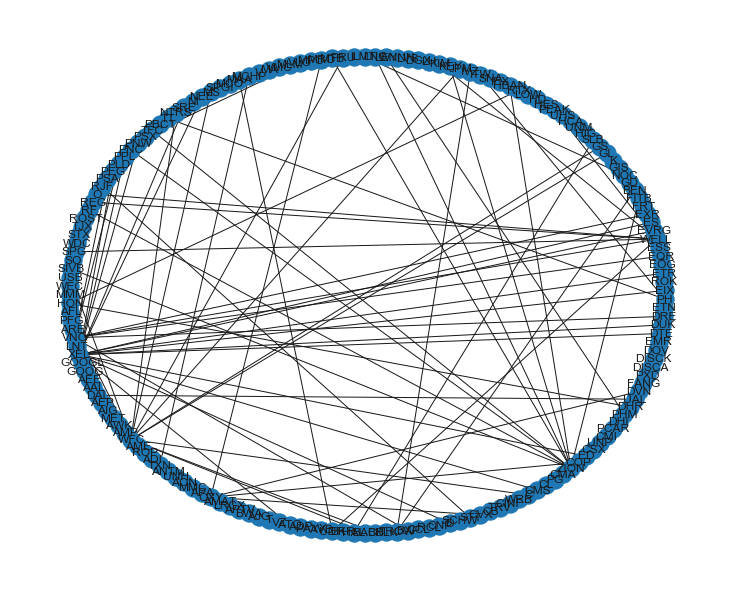

In [26]:
g = nx.Graph()
g = nx.from_pandas_edgelist(edges_df, 'Source', 'Target')
plt.figure(figsize=(10, 8))
nx.draw_shell(g, with_labels=True)

In [36]:
len(g.edges())

131

In [28]:
from networkx.algorithms.centrality import degree_centrality, betweenness_centrality, closeness_centrality

degree_of_centrality = pd.DataFrame(degree_centrality(g).items())
betweenness_centrality = pd.DataFrame(betweenness_centrality(g).items())
closeness_centrality = pd.DataFrame(closeness_centrality(g).items())


In [67]:
def portfolio_test(df, top):
    df = df.sort_values(1, ascending=False)[:top]
    port1_assets = list(df[0])
    weight = np.array(df[1])
    weight = weight / sum(weight)
    p = Engine(
    start_date = '2016-01-01',
    end_date = '2021-11-30',
    portfolio = port1_assets,
    weights = weight,
    benchmark = ['SPY']
    )

    empyrial(p)

In [89]:
def portfolio_test_(df, top):
    df = df.sort_values(1, ascending=False)[top:]
    port1_assets = list(df[0])
    weight = 1 / np.array(df[1])
    weight = weight / sum(weight)
    p = Engine(
    start_date = '2016-01-01',
    end_date = '2021-11-30',
    portfolio = port1_assets,
    weights = weight,
    benchmark = ['SPY']
    )

    empyrial(p)

All


Start date: 2016-01-01
End date: 2021-11-30


Backtest
                             
Annual return          14.04%
Cumulative return     117.44%
Annual volatility     22.46 %
Winning day ratio      55.84%
Sharpe ratio              0.7
Calmar ratio             0.31
Information ratio   -0.000000
Stability                0.72
Max Drawdown         -45.19 %
Sortino ratio            0.97
Skew                    -0.72
Kurtosis                23.09
Tail Ratio               0.91
Common sense ratio       1.06
Daily value at risk    -2.0 %
Alpha               -0.030000
Beta                 1.100000

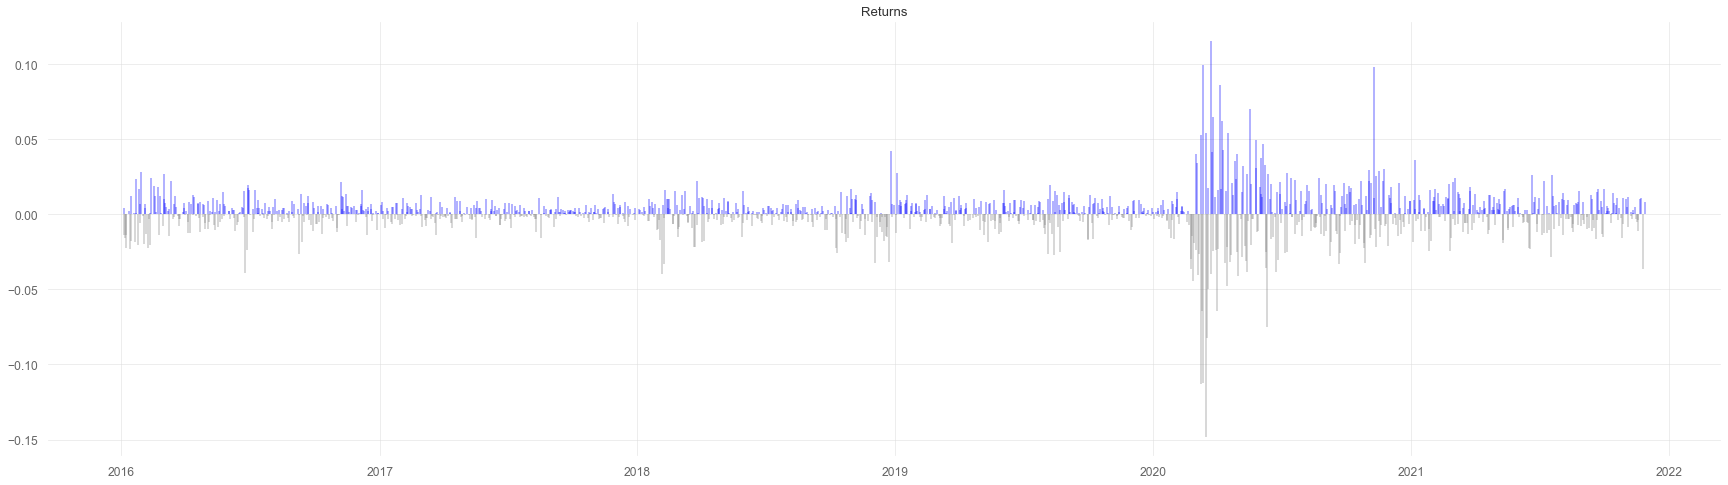

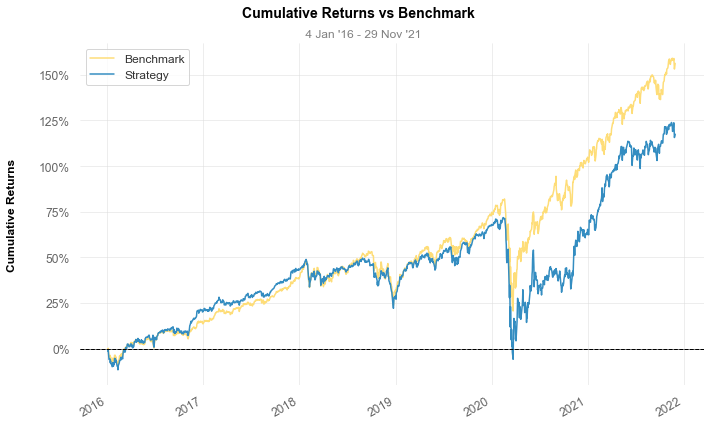

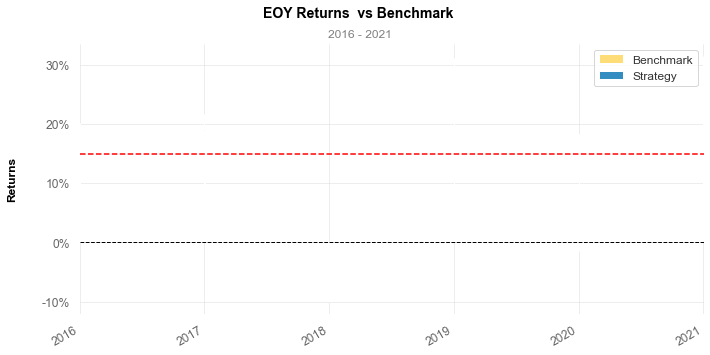

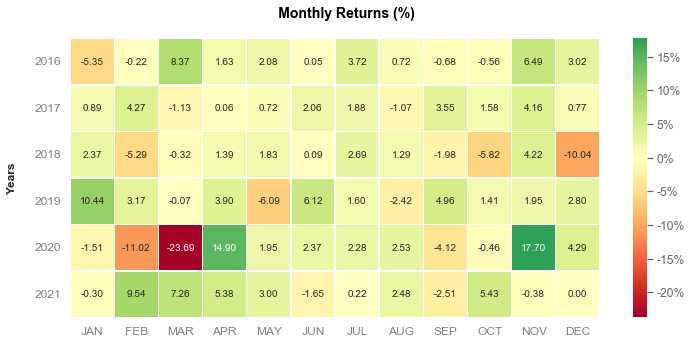

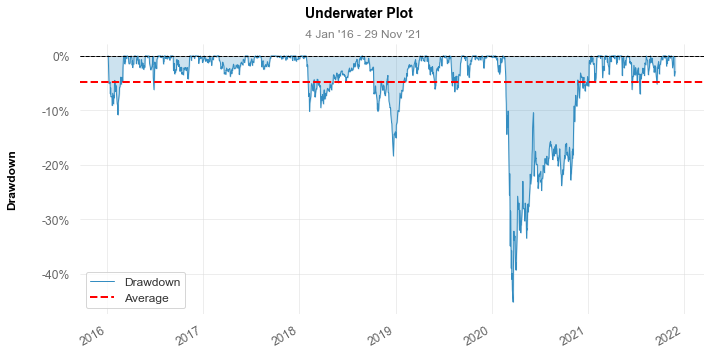

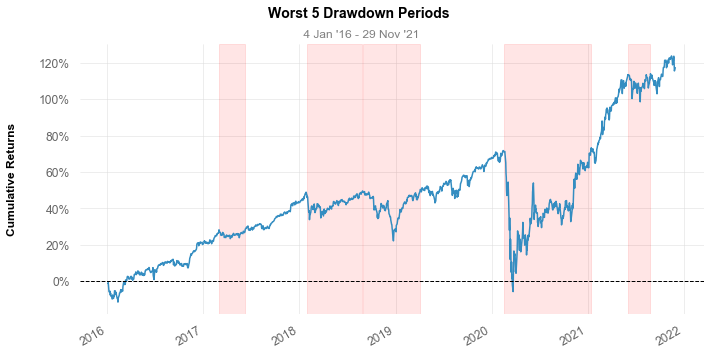

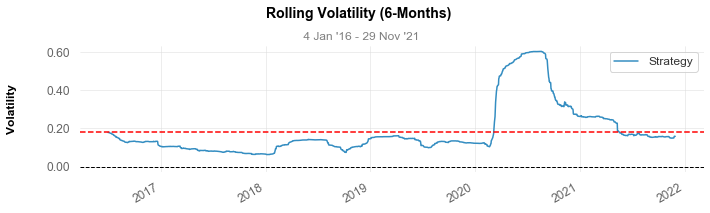

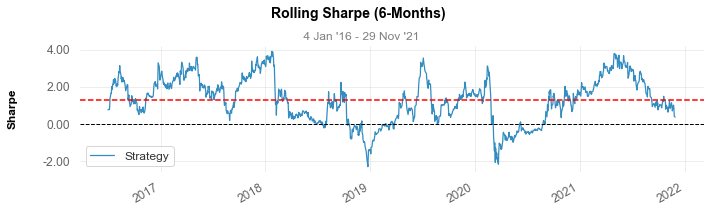

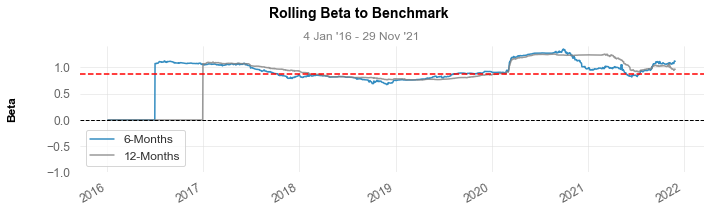

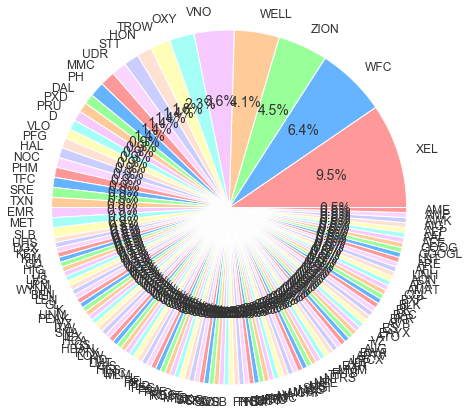

In [68]:
portfolio_test(degree_of_centrality, len(g.edges()))

Top

Start date: 2016-01-01
End date: 2021-11-30


Backtest
                             
Annual return          11.57%
Cumulative return      90.94%
Annual volatility     23.33 %
Winning day ratio       54.6%
Sharpe ratio             0.59
Calmar ratio             0.25
Information ratio   -0.000000
Stability                0.55
Max Drawdown         -46.12 %
Sortino ratio            0.82
Skew                    -0.55
Kurtosis                23.12
Tail Ratio               0.93
Common sense ratio       1.06
Daily value at risk    -2.0 %
Alpha               -0.050000
Beta                 1.070000

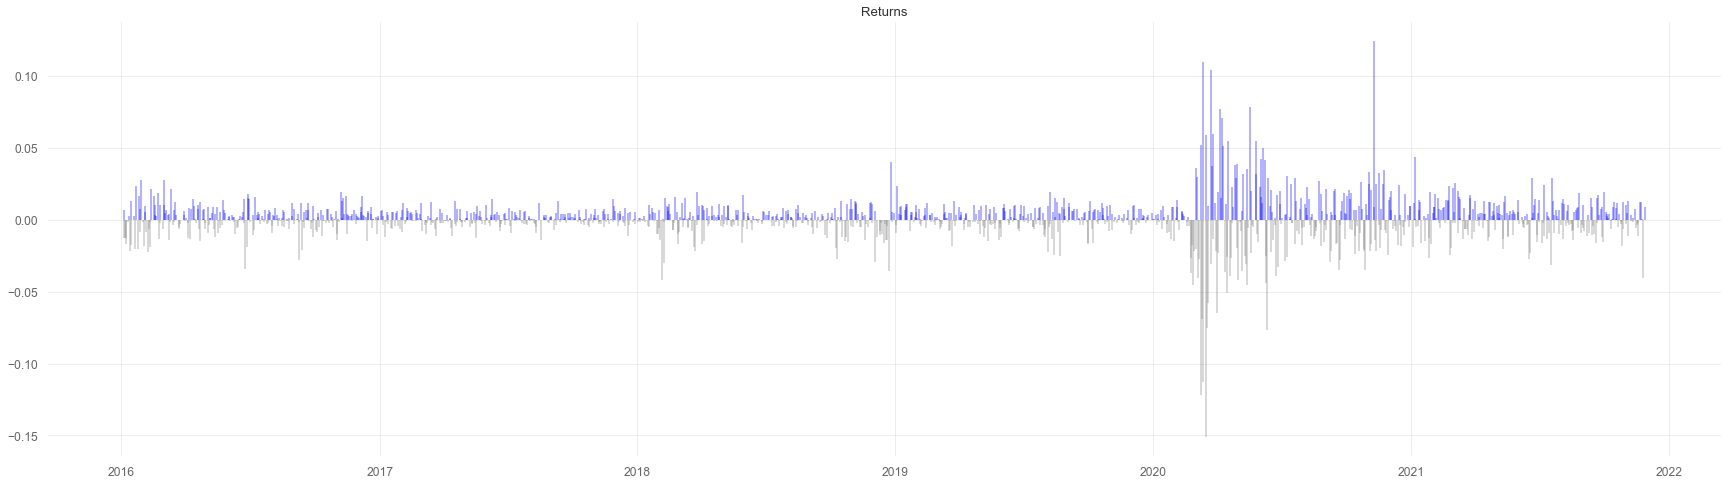

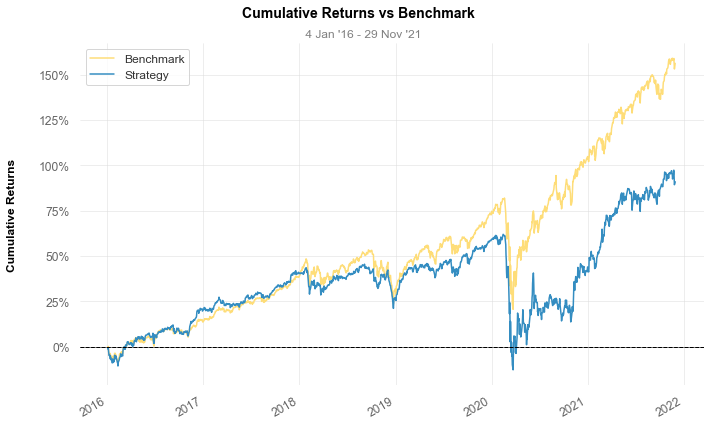

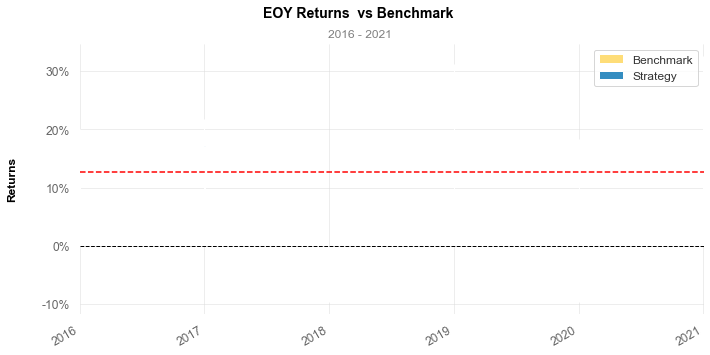

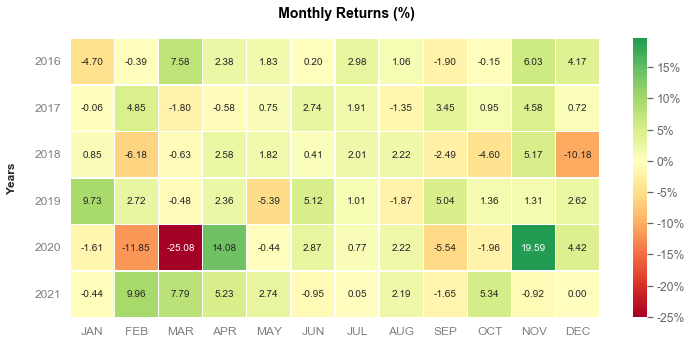

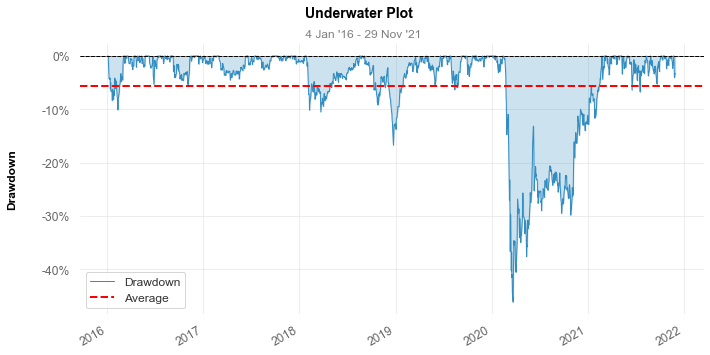

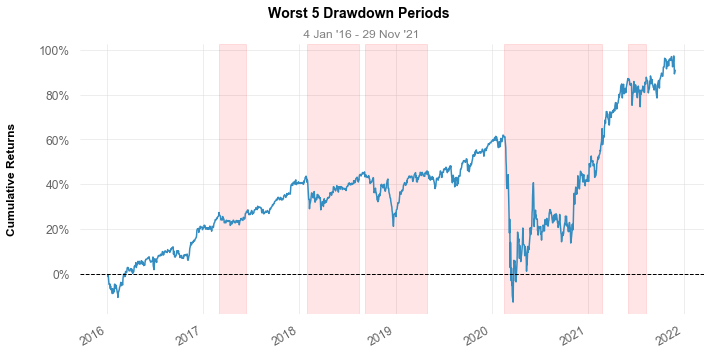

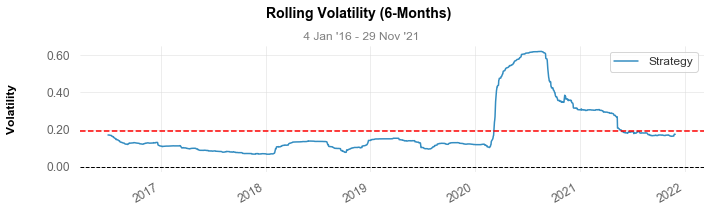

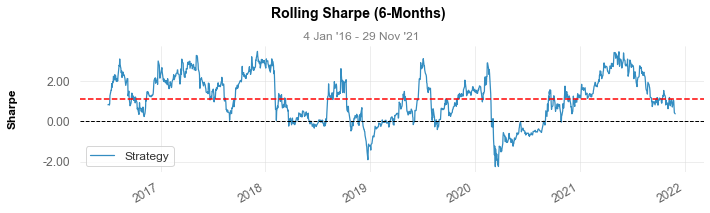

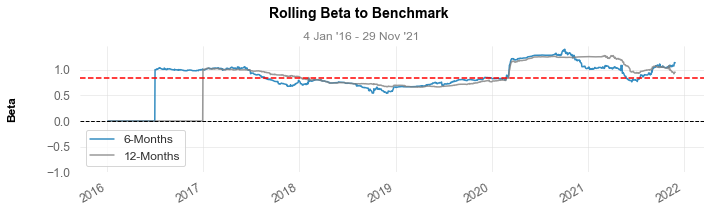

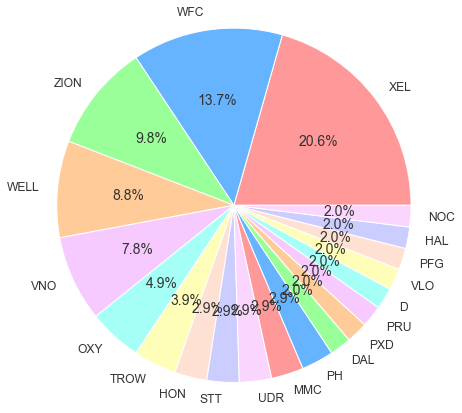

In [69]:
portfolio_test(degree_of_centrality, int(len(g.edges()) - 111))

Start date: 2016-01-01
End date: 2021-11-30


Backtest
                             
Annual return          11.96%
Cumulative return      94.98%
Annual volatility     23.28 %
Winning day ratio       55.0%
Sharpe ratio              0.6
Calmar ratio             0.26
Information ratio   -0.000000
Stability                0.59
Max Drawdown         -46.56 %
Sortino ratio            0.84
Skew                    -0.64
Kurtosis                23.13
Tail Ratio               0.93
Common sense ratio       1.06
Daily value at risk    -2.0 %
Alpha               -0.050000
Beta                 1.090000

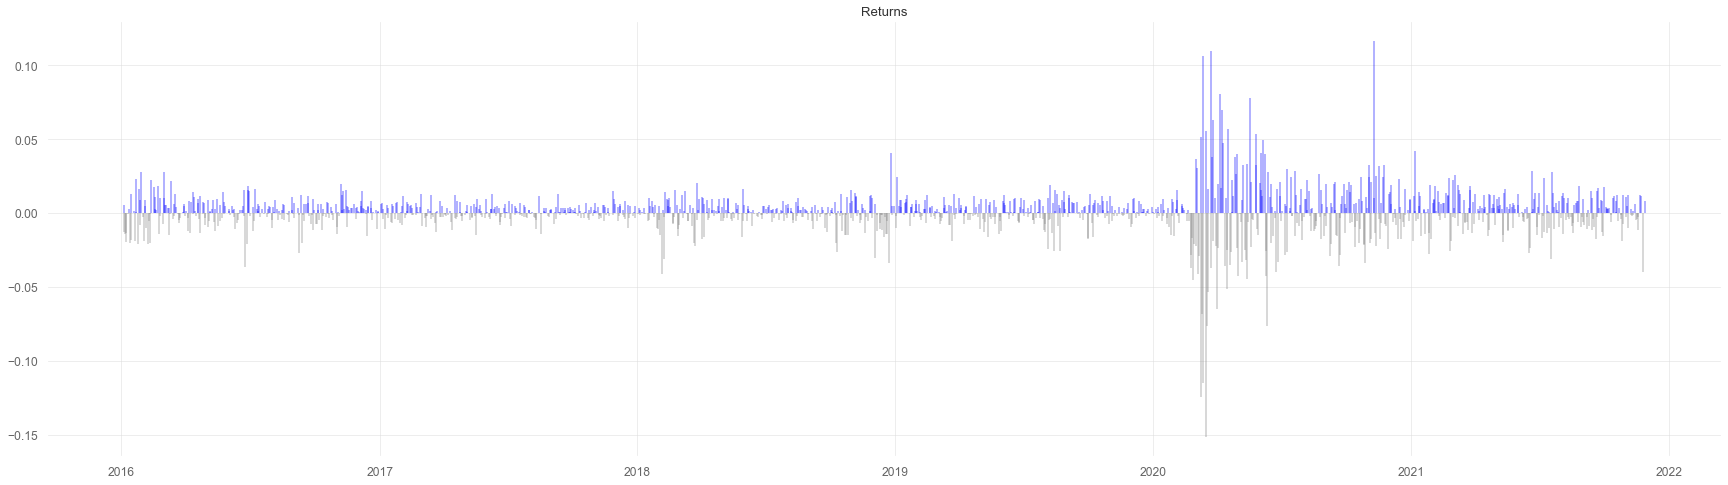

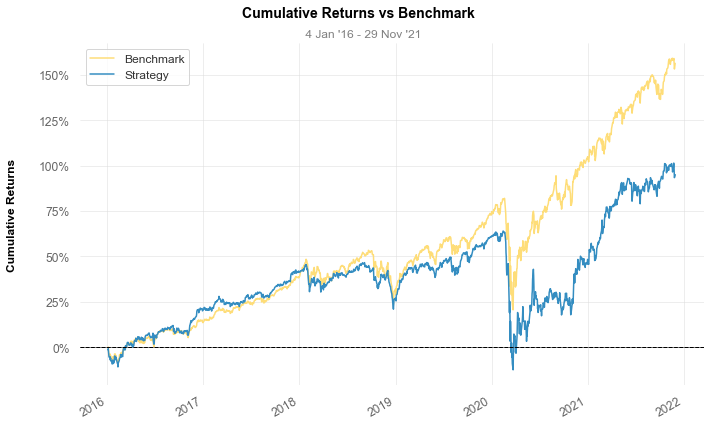

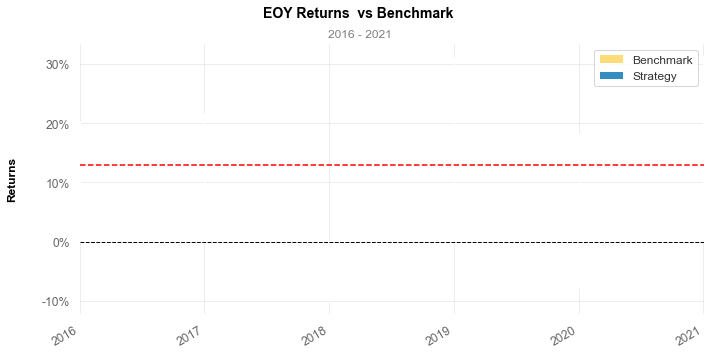

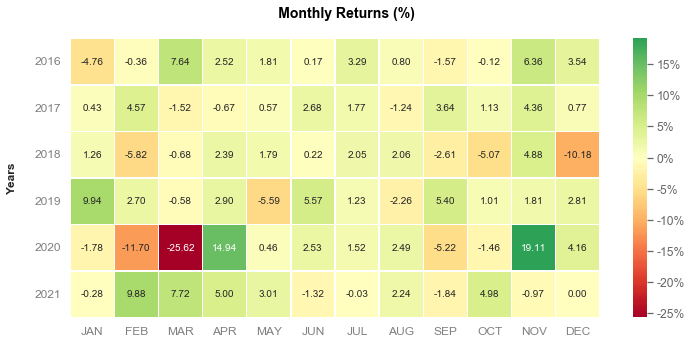

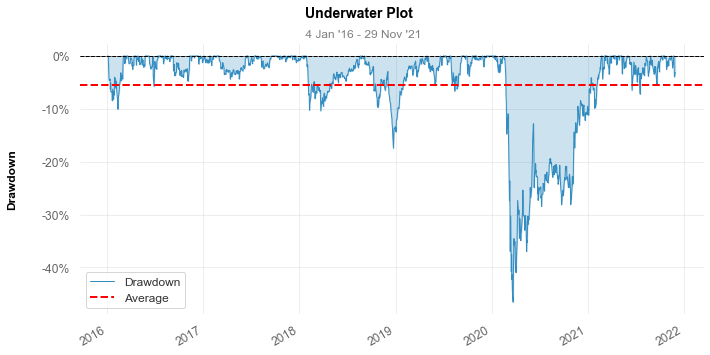

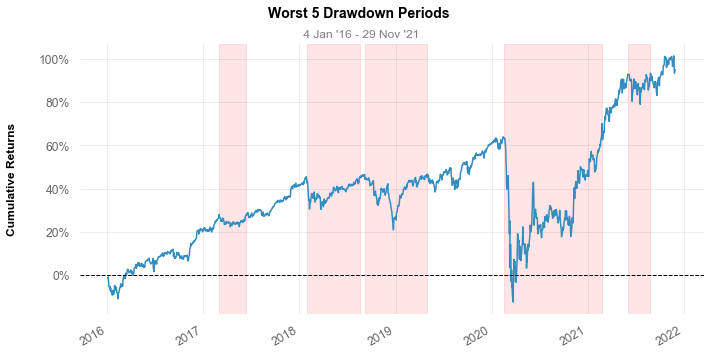

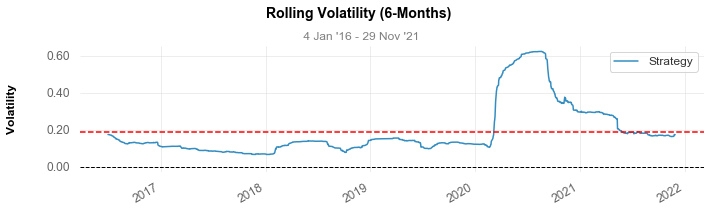

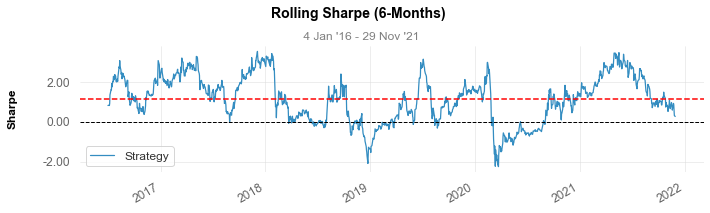

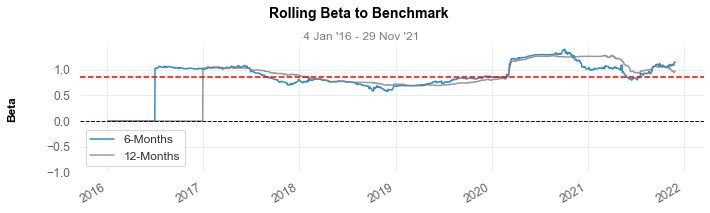

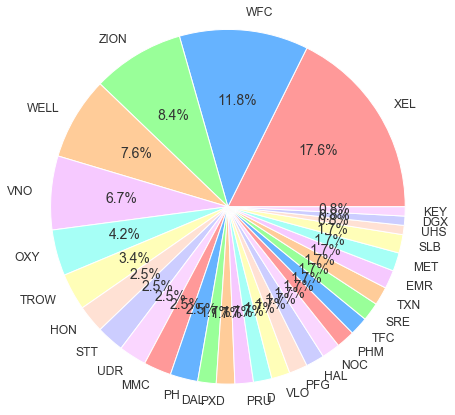

In [70]:
portfolio_test(degree_of_centrality, int(len(g.edges()) - 101))

Start date: 2016-01-01
End date: 2021-11-30


Backtest
                             
Annual return          10.93%
Cumulative return      84.54%
Annual volatility     23.24 %
Winning day ratio      55.04%
Sharpe ratio             0.56
Calmar ratio             0.25
Information ratio   -0.000000
Stability                0.54
Max Drawdown          -44.5 %
Sortino ratio            0.79
Skew                    -0.51
Kurtosis                22.91
Tail Ratio               0.93
Common sense ratio       1.05
Daily value at risk    -2.0 %
Alpha               -0.050000
Beta                 1.030000

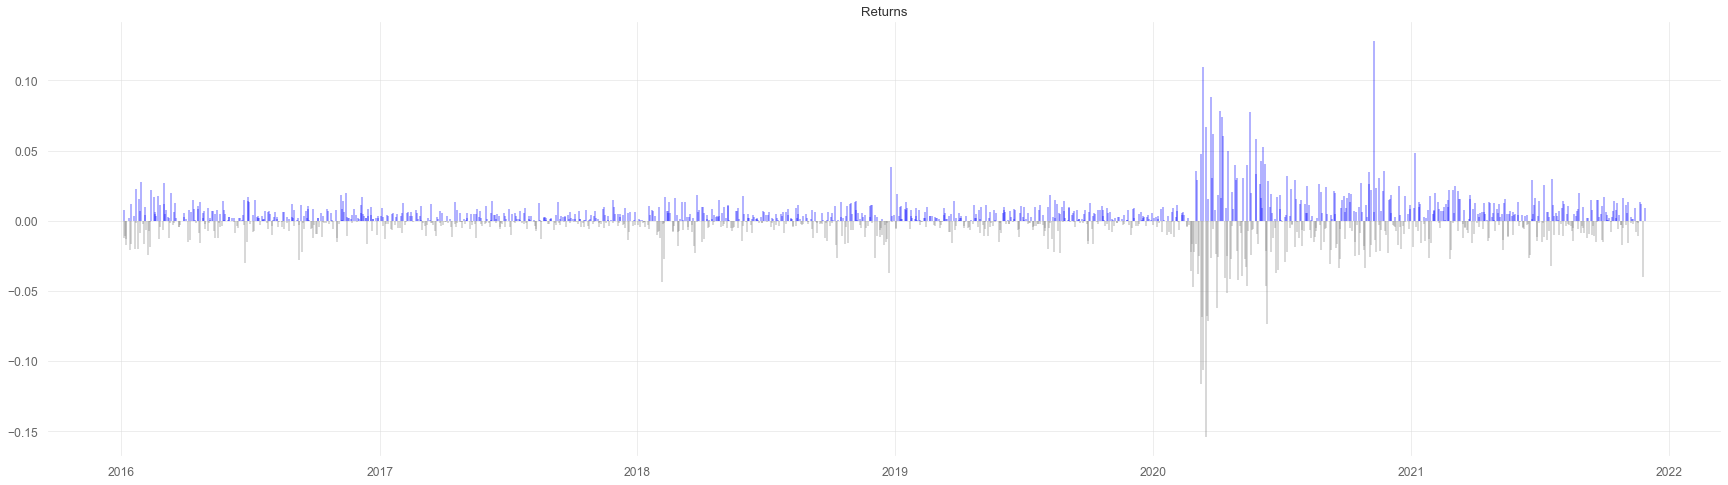

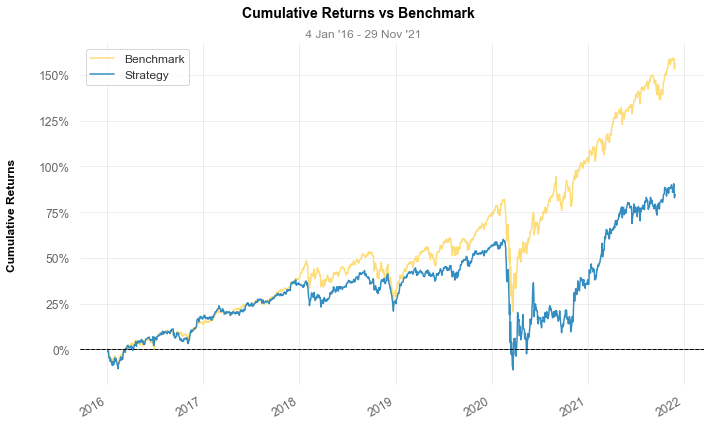

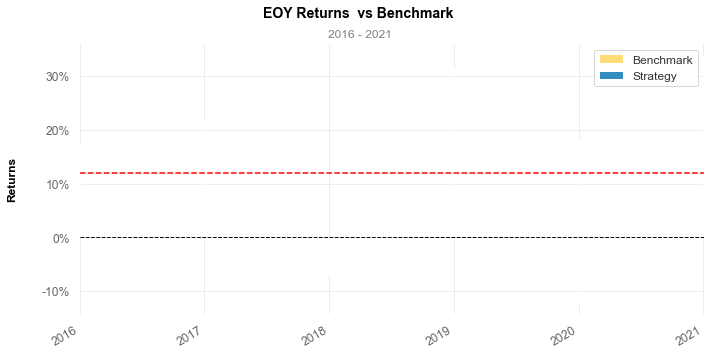

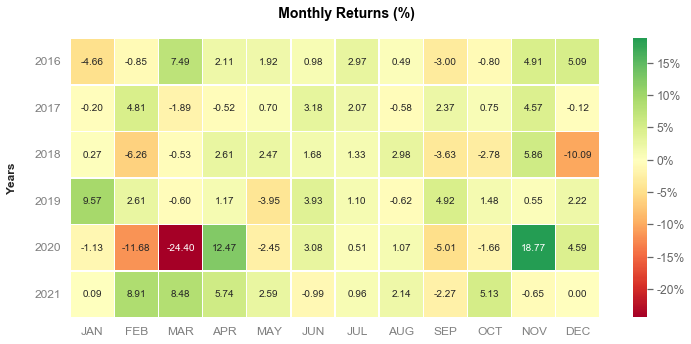

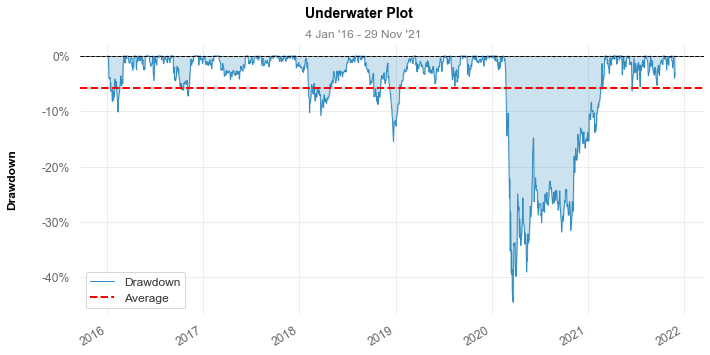

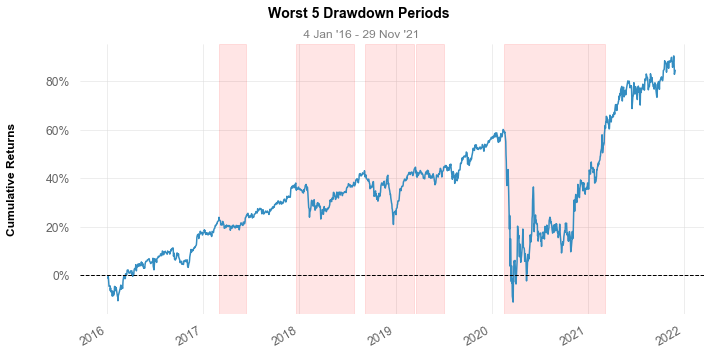

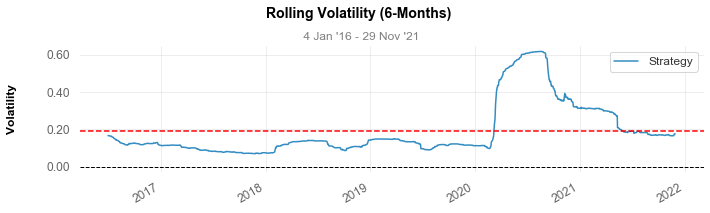

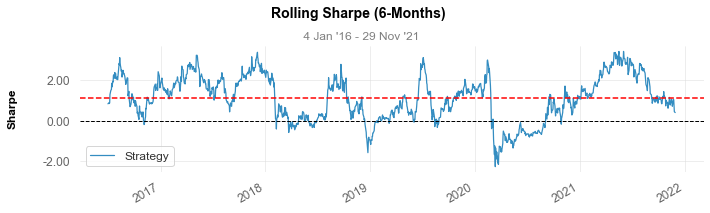

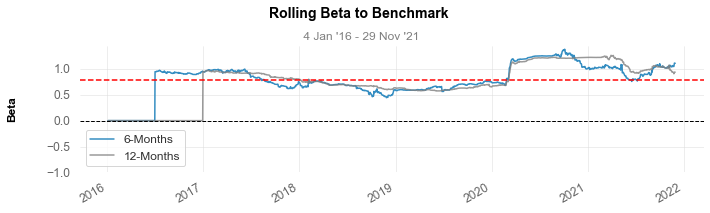

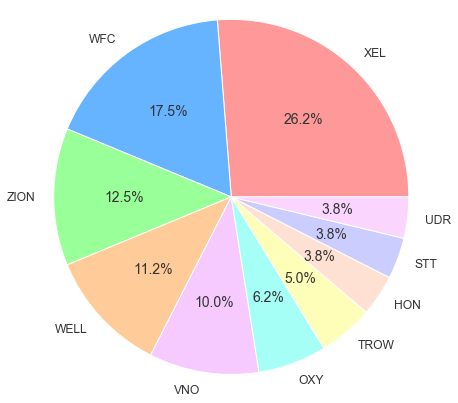

In [71]:
portfolio_test(degree_of_centrality, int(len(g.edges()) - 121))

Bottom

Start date: 2016-01-01
End date: 2021-11-30


Backtest
                             
Annual return          16.32%
Cumulative return     144.21%
Annual volatility     20.61 %
Winning day ratio      56.18%
Sharpe ratio             0.84
Calmar ratio             0.38
Information ratio   -0.000000
Stability                0.84
Max Drawdown          -43.2 %
Sortino ratio            1.17
Skew                    -0.69
Kurtosis                25.48
Tail Ratio                0.9
Common sense ratio       1.08
Daily value at risk    -2.0 %
Alpha               -0.010000
Beta                 1.040000

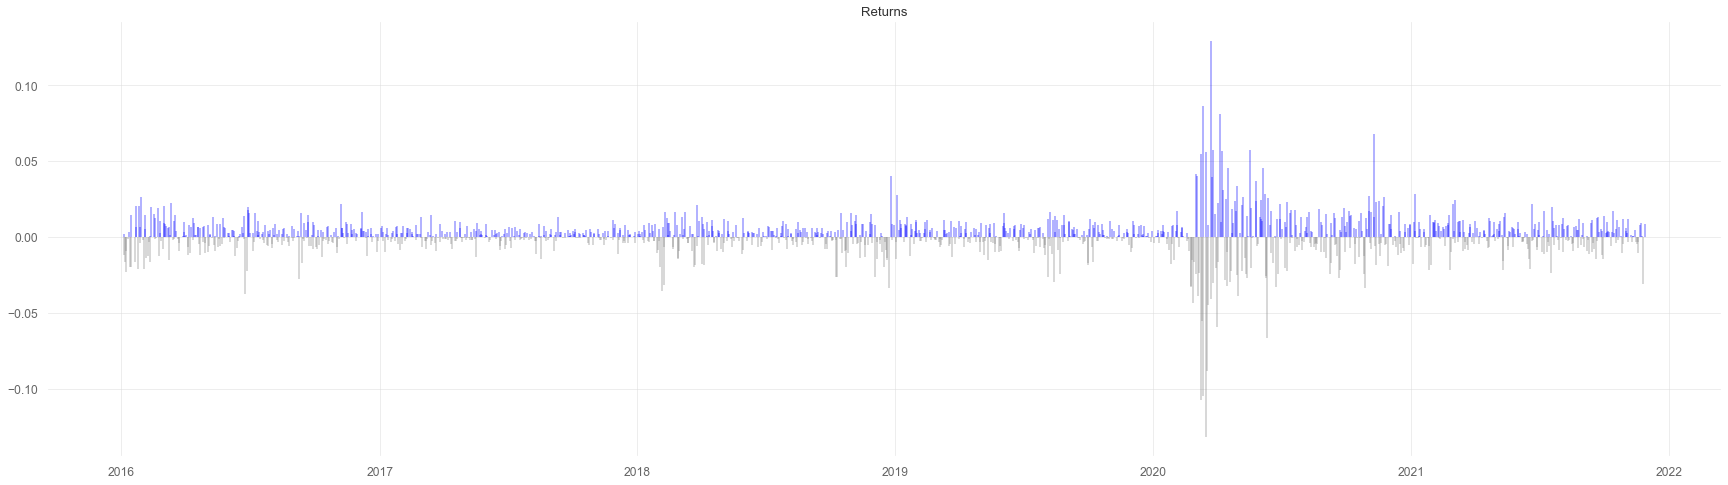

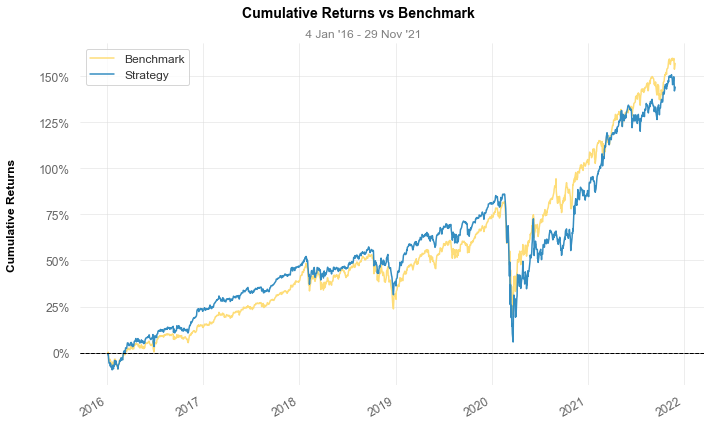

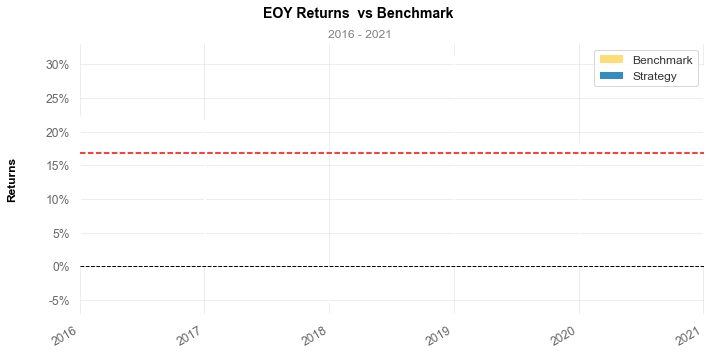

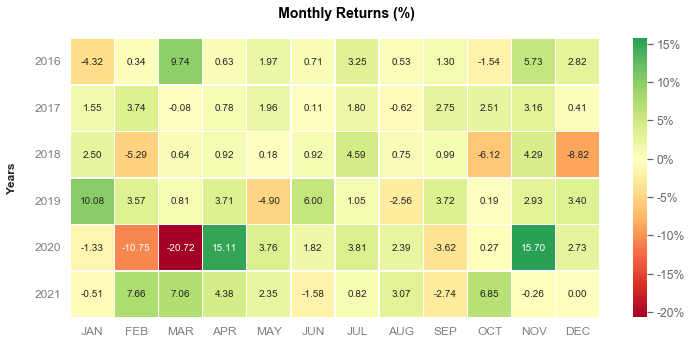

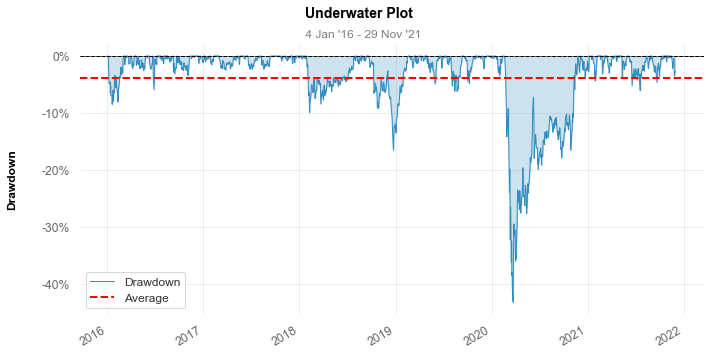

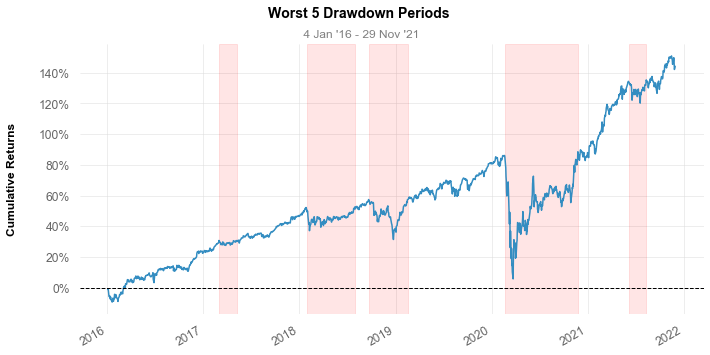

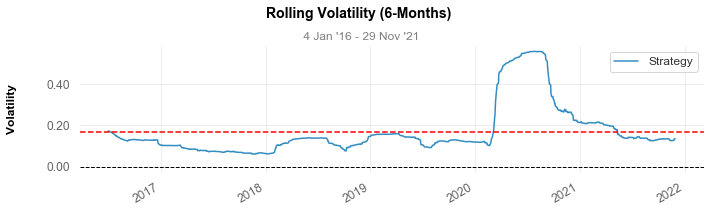

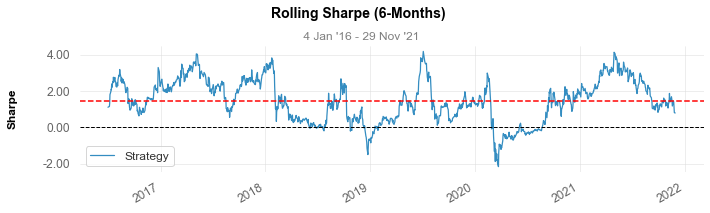

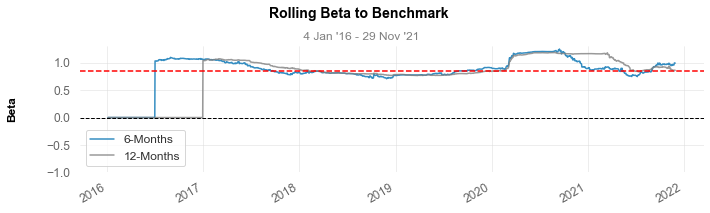

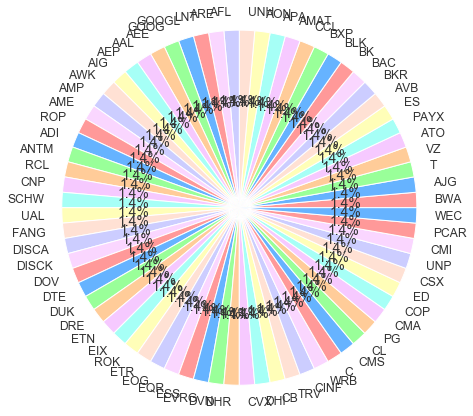

In [90]:
portfolio_test_(degree_of_centrality, int(len(g.edges()) - 30))

Start date: 2016-01-01
End date: 2021-11-30


Backtest
                             
Annual return          16.91%
Cumulative return     151.54%
Annual volatility     21.02 %
Winning day ratio      55.91%
Sharpe ratio             0.85
Calmar ratio             0.38
Information ratio    0.000000
Stability                0.84
Max Drawdown         -44.04 %
Sortino ratio            1.18
Skew                    -0.77
Kurtosis                 25.7
Tail Ratio               0.89
Common sense ratio       1.07
Daily value at risk    -2.0 %
Alpha               -0.010000
Beta                 1.060000

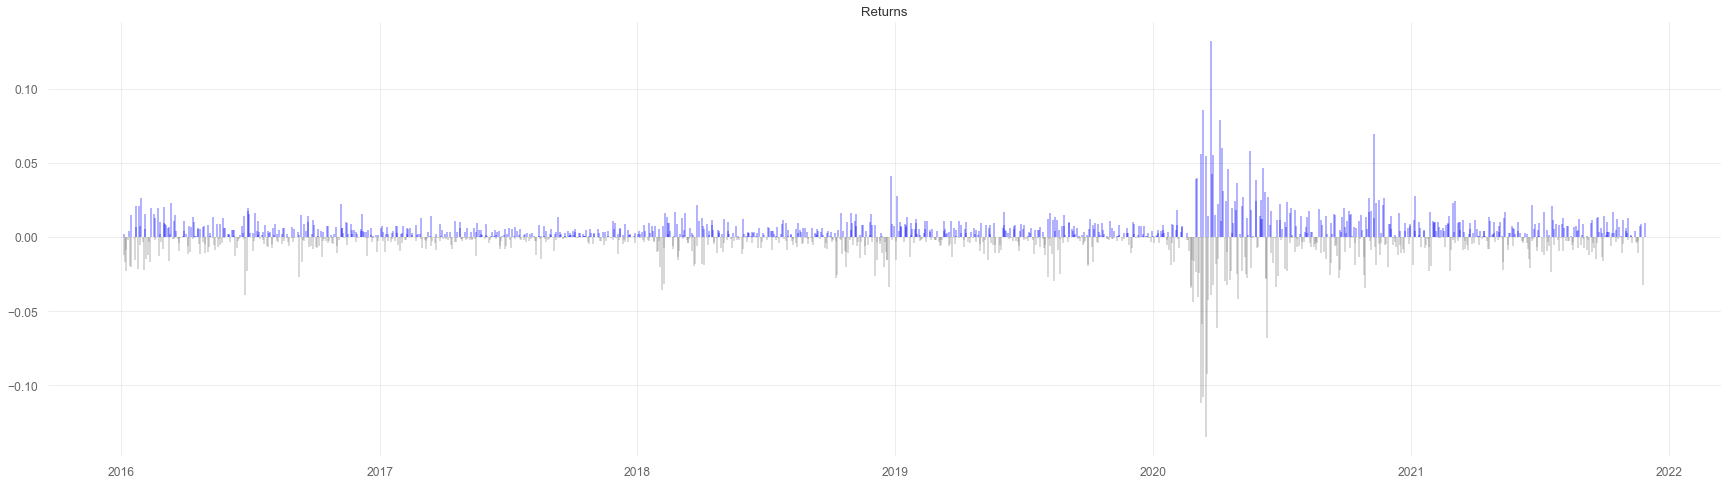

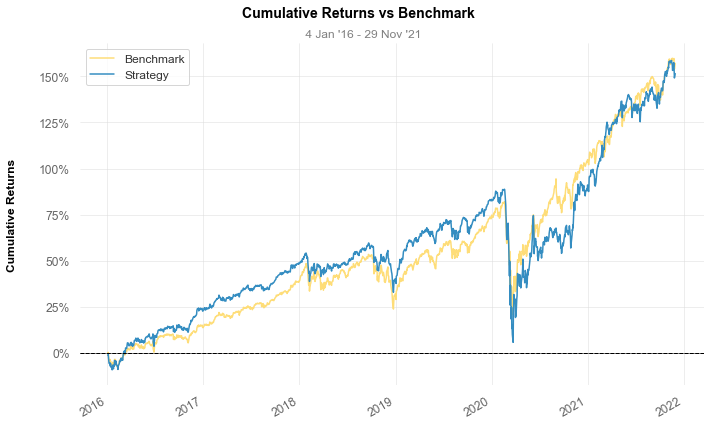

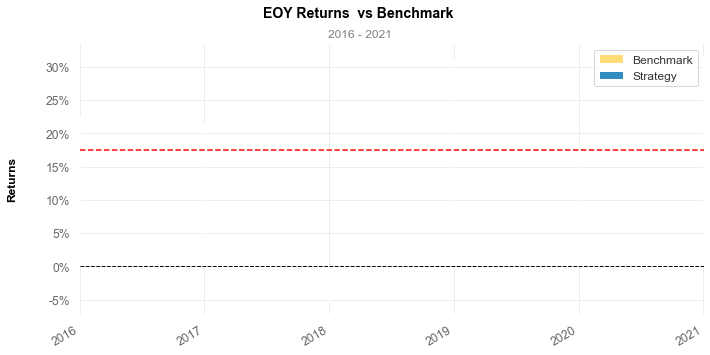

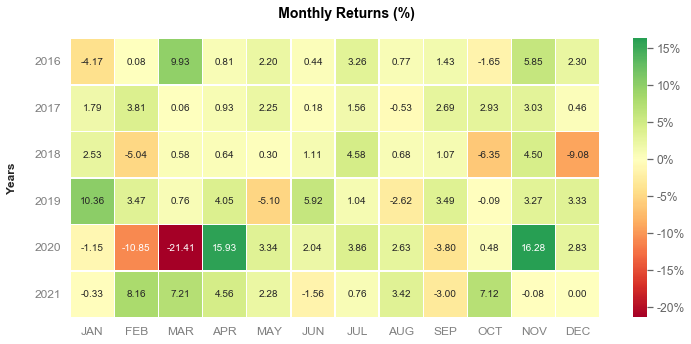

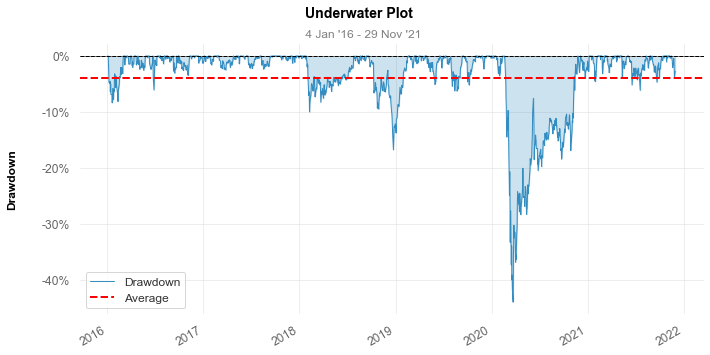

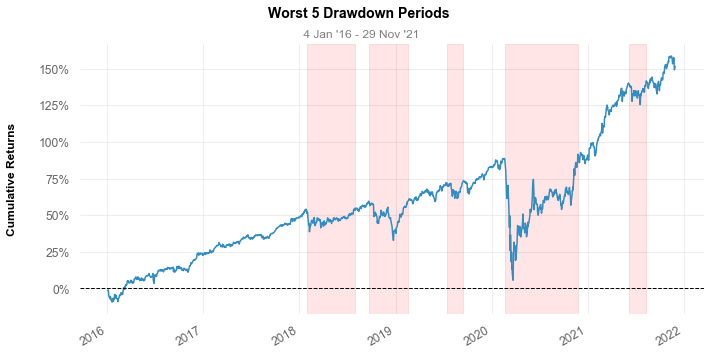

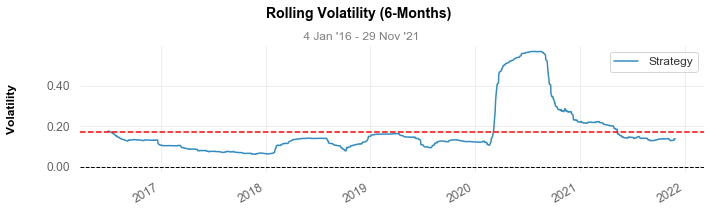

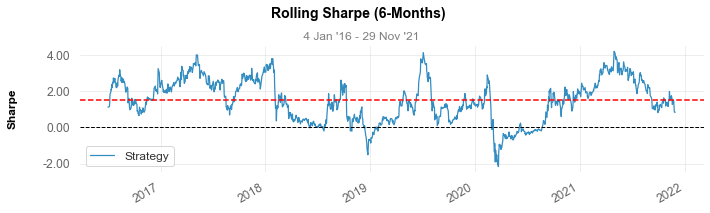

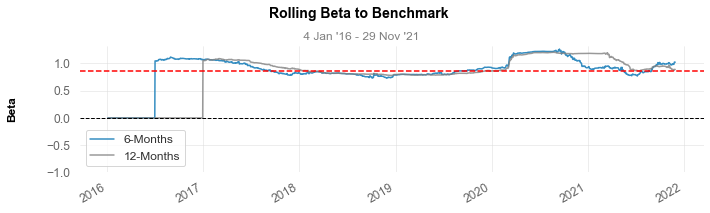

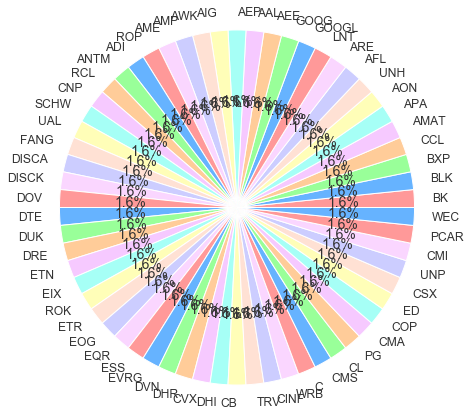

In [74]:
portfolio_test_(degree_of_centrality, int(len(g.edges()) - 20))

Start date: 2016-01-01
End date: 2021-11-30


Backtest
                             
Annual return          16.77%
Cumulative return     149.79%
Annual volatility      20.5 %
Winning day ratio      56.25%
Sharpe ratio             0.86
Calmar ratio             0.39
Information ratio    0.000000
Stability                0.86
Max Drawdown         -42.87 %
Sortino ratio             1.2
Skew                    -0.67
Kurtosis                24.73
Tail Ratio                0.9
Common sense ratio       1.08
Daily value at risk    -2.0 %
Alpha               -0.000000
Beta                 1.030000

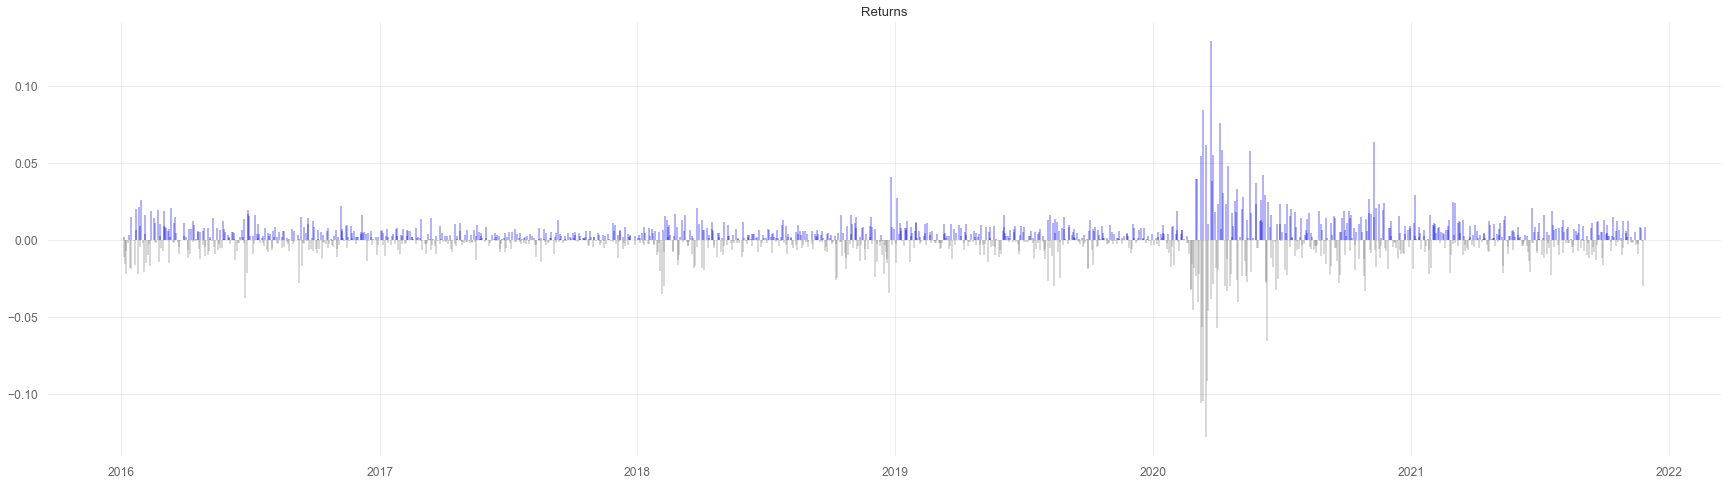

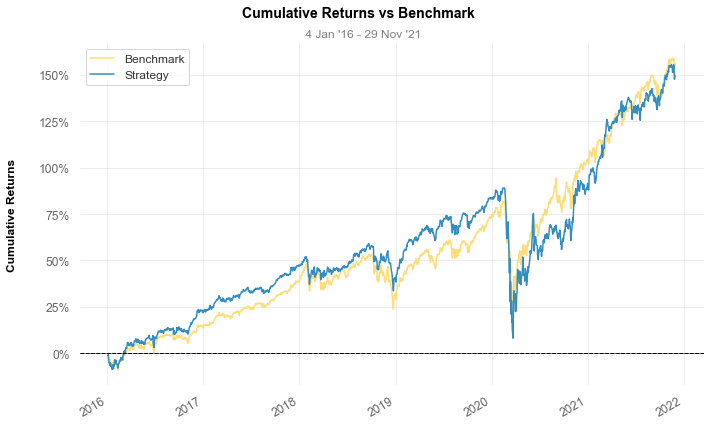

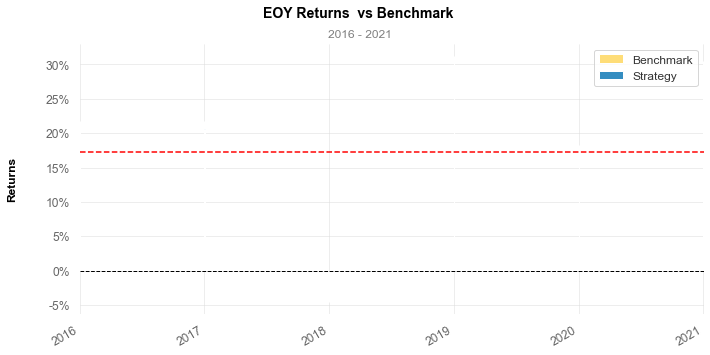

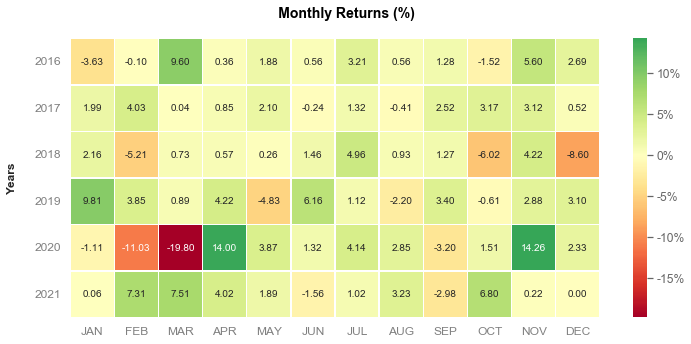

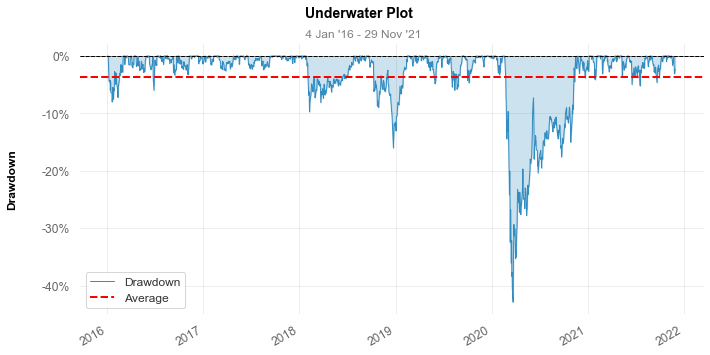

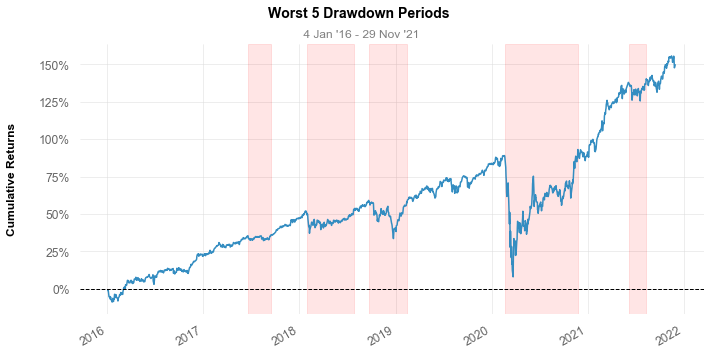

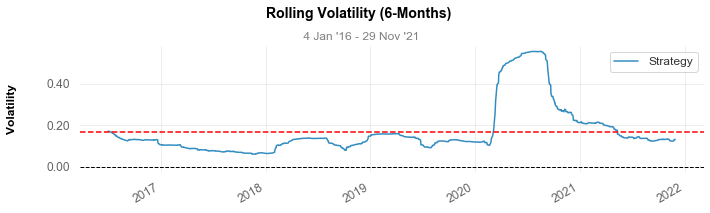

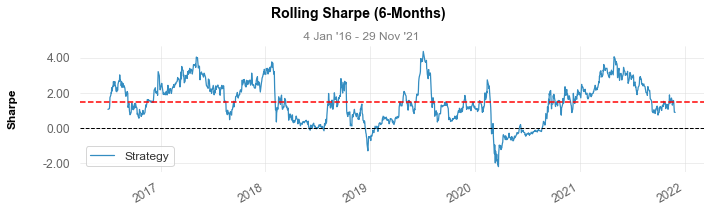

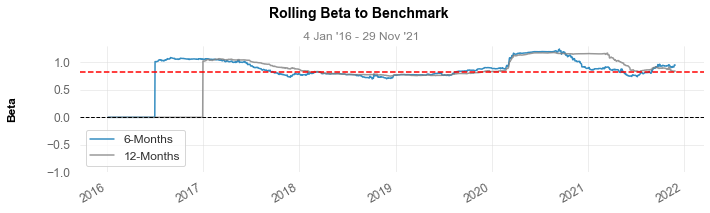

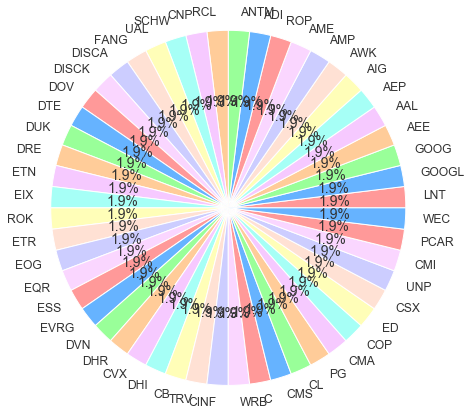

In [75]:
portfolio_test_(degree_of_centrality, int(len(g.edges()) - 10))

Start date: 2016-01-01
End date: 2021-11-30


Backtest
                             
Annual return          17.25%
Cumulative return     155.85%
Annual volatility     20.83 %
Winning day ratio      56.25%
Sharpe ratio             0.87
Calmar ratio              0.4
Information ratio    0.000000
Stability                0.86
Max Drawdown         -43.42 %
Sortino ratio            1.21
Skew                    -0.78
Kurtosis                25.38
Tail Ratio               0.92
Common sense ratio       1.11
Daily value at risk    -2.0 %
Alpha                0.000000
Beta                 1.030000

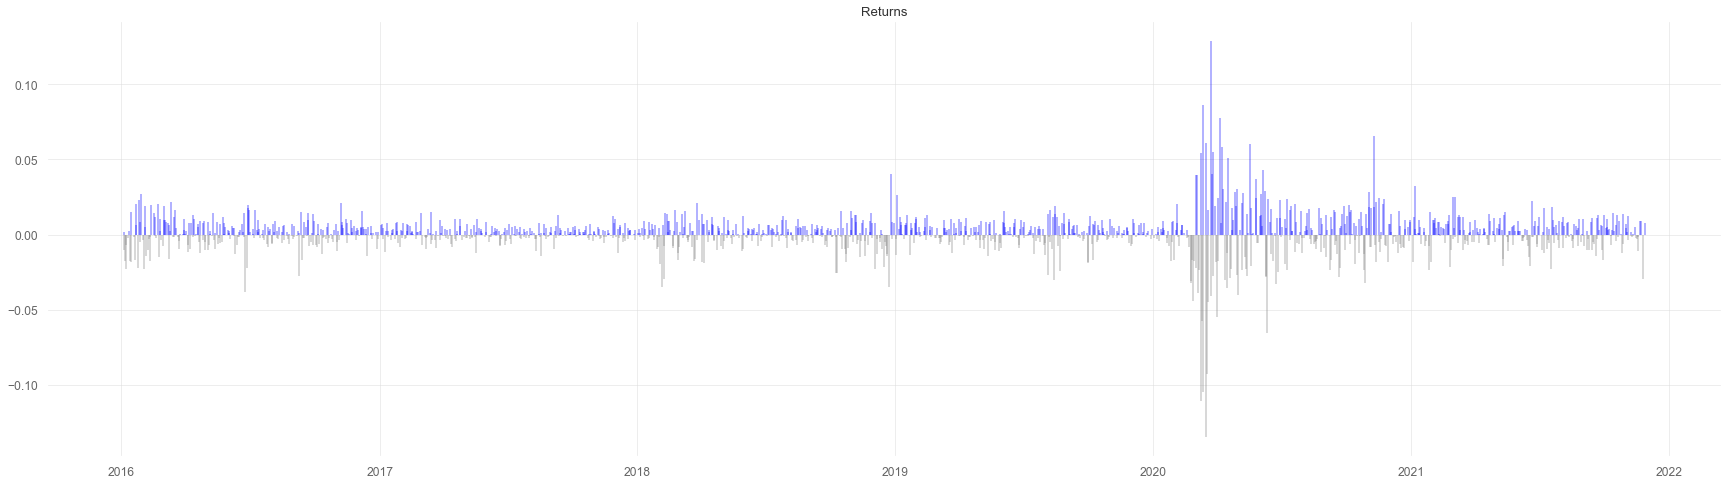

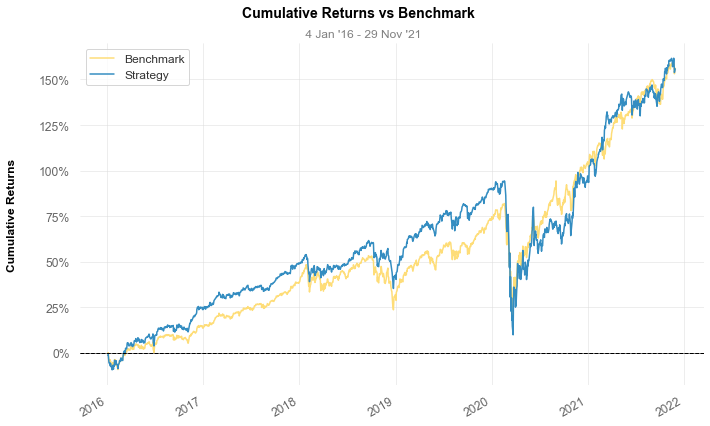

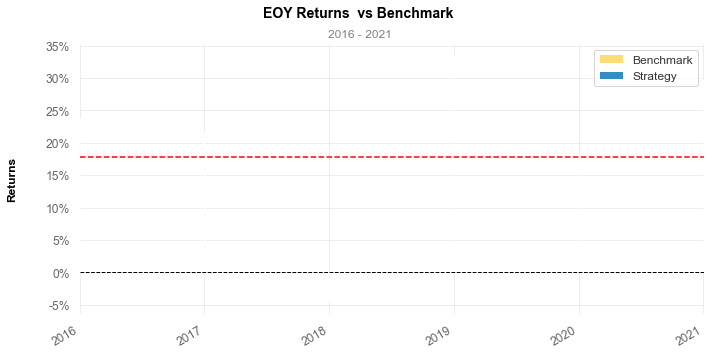

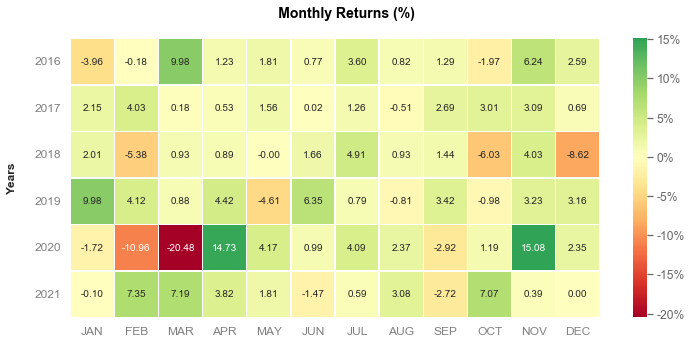

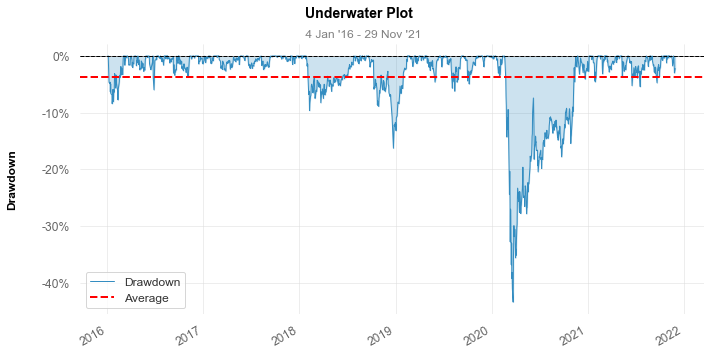

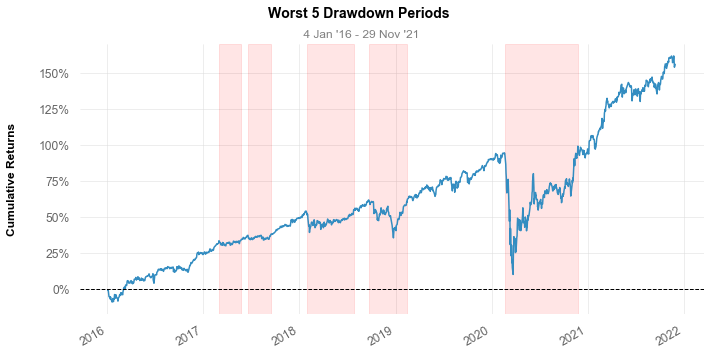

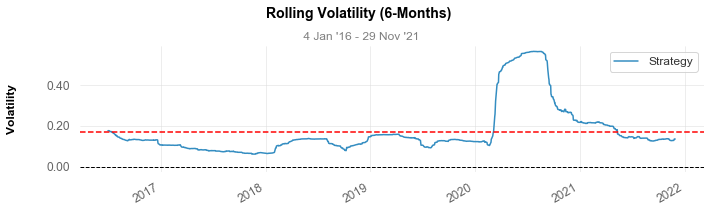

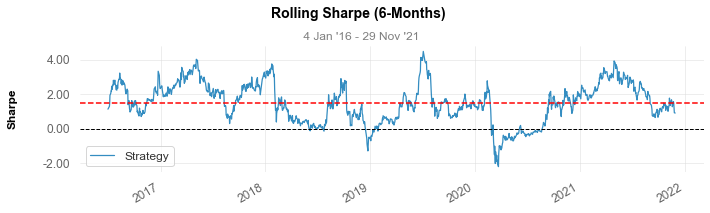

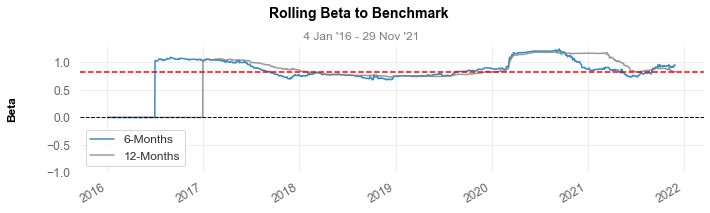

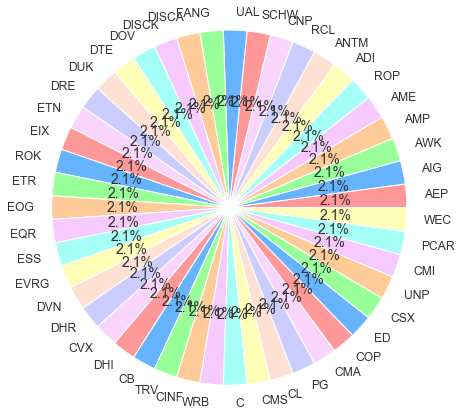

In [76]:
portfolio_test_(degree_of_centrality, int(len(g.edges()) - 5))

Closeness Centrality

Start date: 2016-01-01
End date: 2021-11-30


Backtest
                             
Annual return          17.81%
Cumulative return     163.17%
Annual volatility     21.65 %
Winning day ratio      54.91%
Sharpe ratio             0.87
Calmar ratio             0.42
Information ratio    0.000000
Stability                0.88
Max Drawdown         -42.44 %
Sortino ratio             1.2
Skew                    -0.91
Kurtosis                21.47
Tail Ratio               0.97
Common sense ratio       1.16
Daily value at risk    -2.0 %
Alpha               -0.010000
Beta                 1.120000

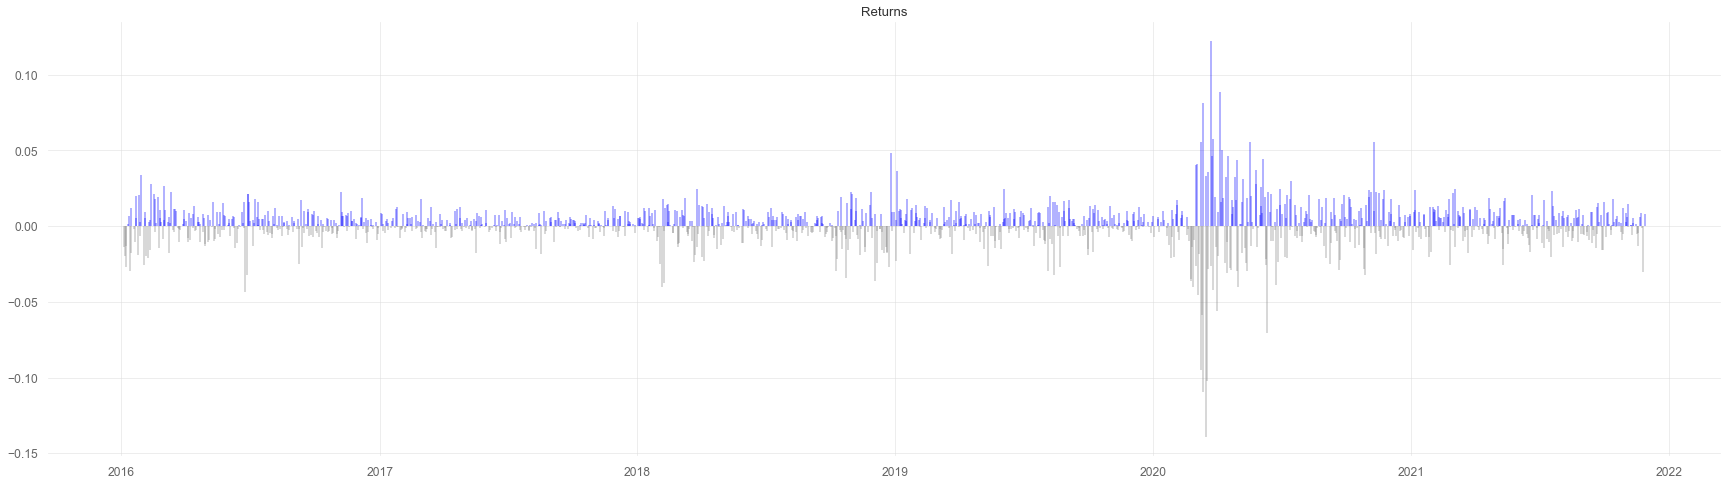

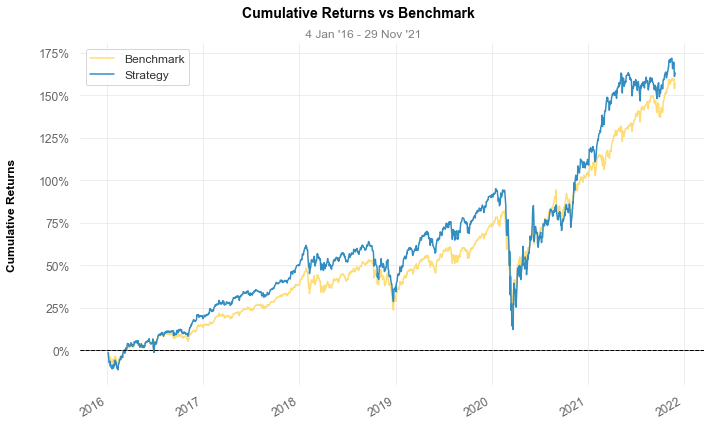

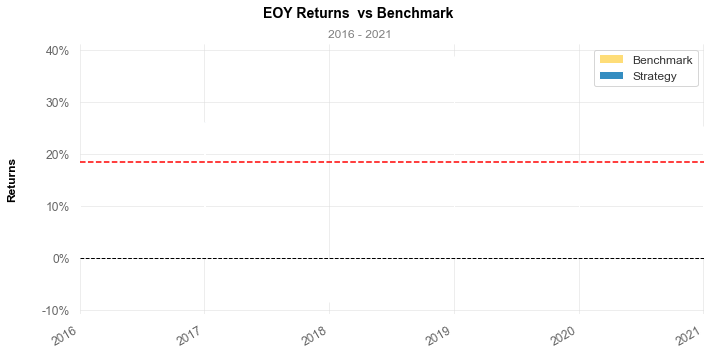

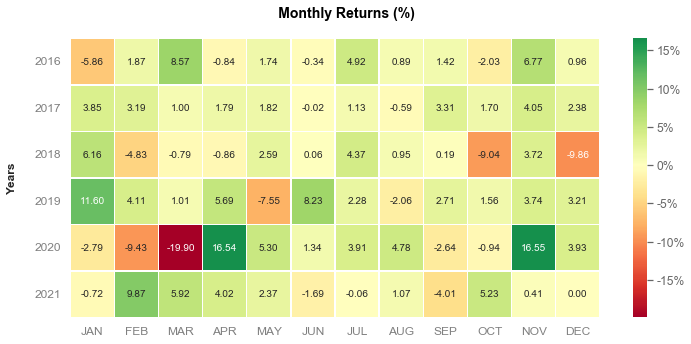

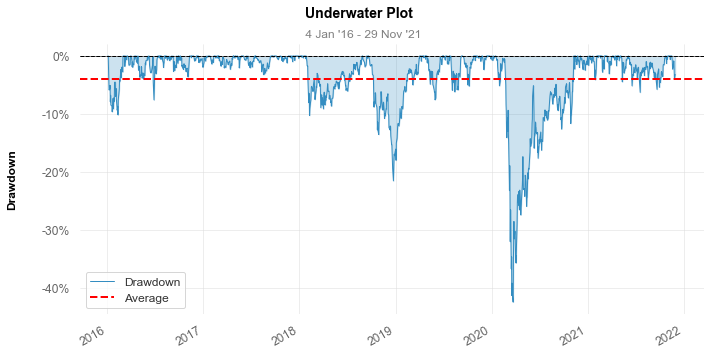

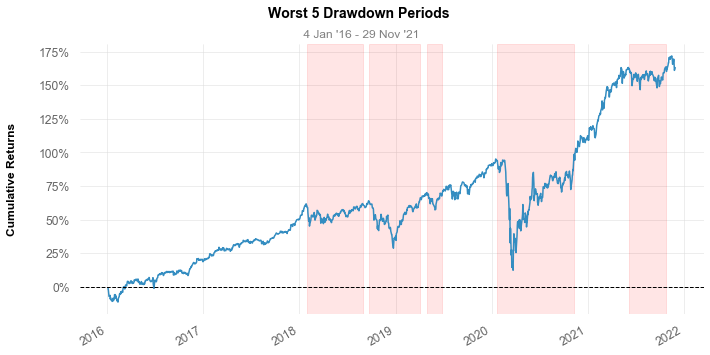

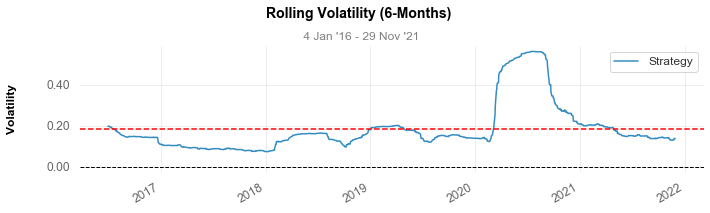

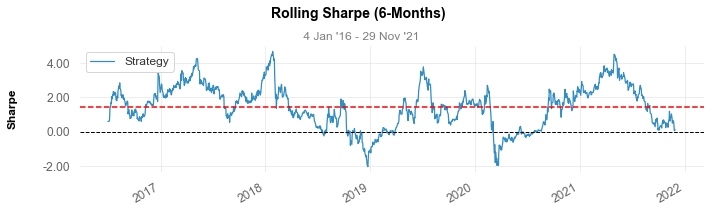

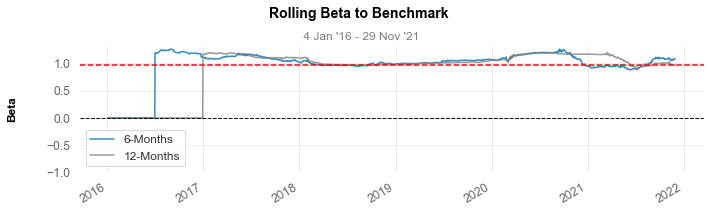

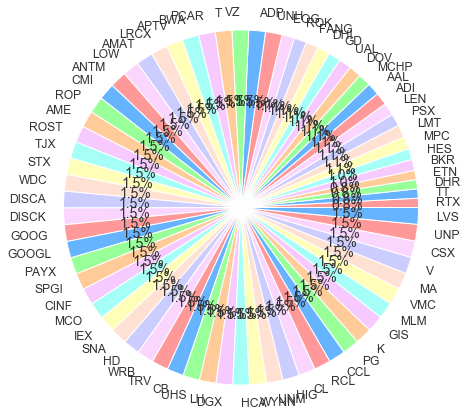

In [91]:
portfolio_test_(closeness_centrality, int(len(g.edges()) - 30))

Start date: 2016-01-01
End date: 2021-11-30


Backtest
                             
Annual return          17.95%
Cumulative return      165.1%
Annual volatility     21.43 %
Winning day ratio      55.11%
Sharpe ratio             0.88
Calmar ratio             0.43
Information ratio    0.000000
Stability                0.89
Max Drawdown         -41.57 %
Sortino ratio            1.22
Skew                    -0.96
Kurtosis                21.87
Tail Ratio               1.01
Common sense ratio       1.21
Daily value at risk    -2.0 %
Alpha               -0.000000
Beta                 1.110000

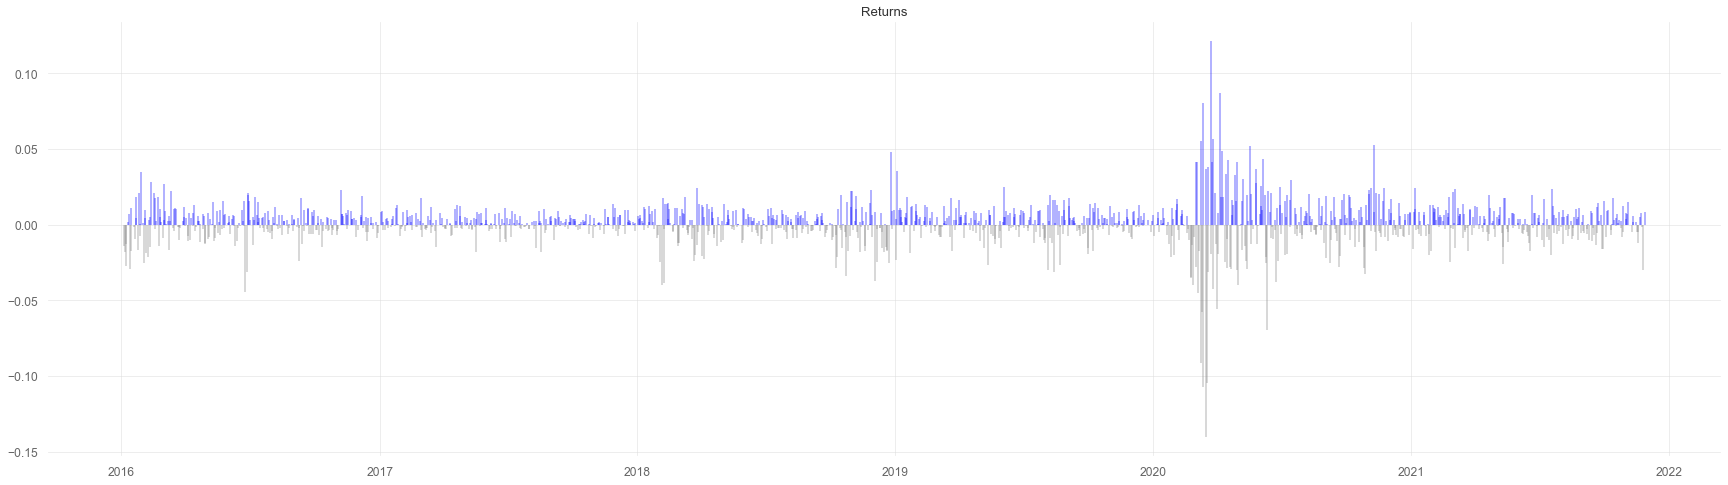

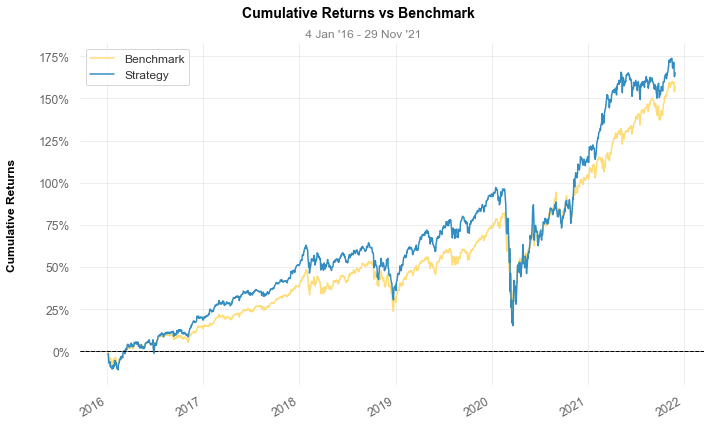

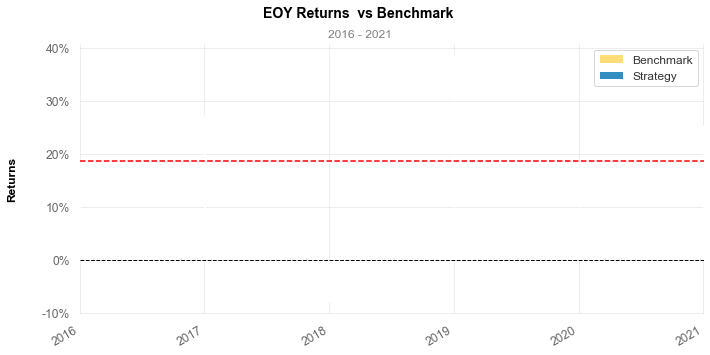

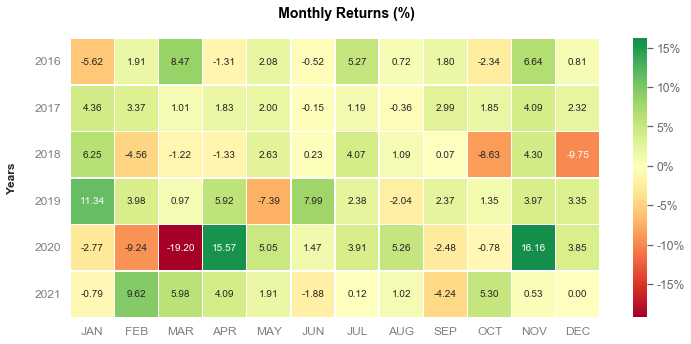

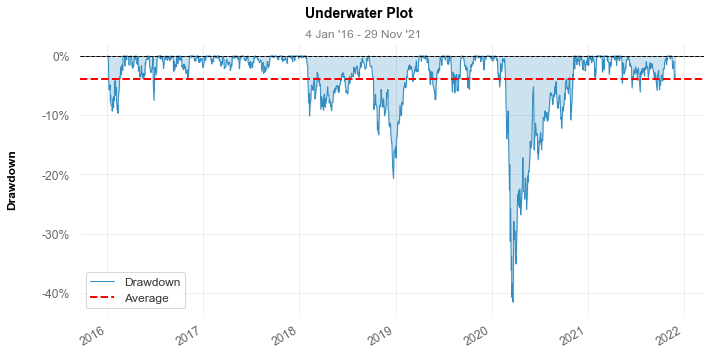

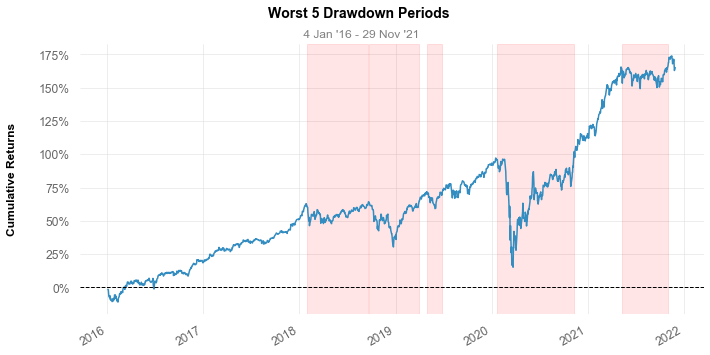

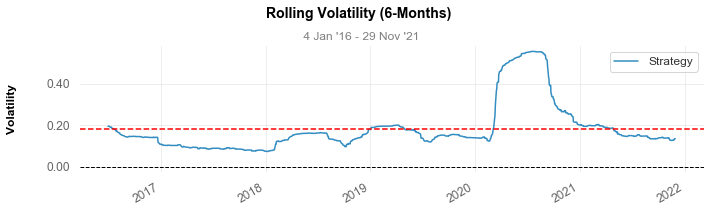

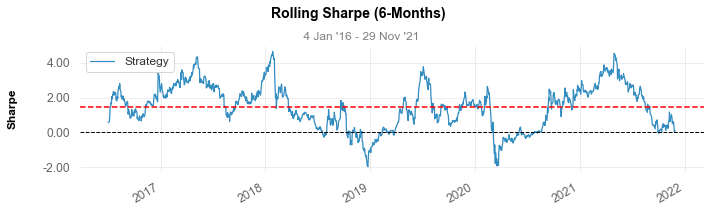

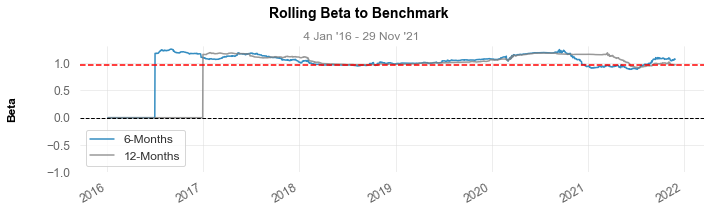

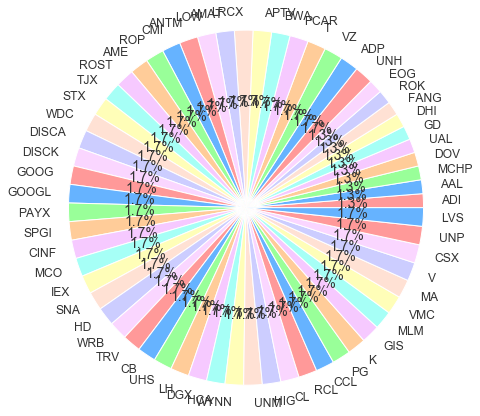

In [92]:
portfolio_test_(closeness_centrality, int(len(g.edges()) - 20))

Start date: 2016-01-01
End date: 2021-11-30


Backtest
                             
Annual return          17.88%
Cumulative return     164.38%
Annual volatility     20.82 %
Winning day ratio      55.41%
Sharpe ratio              0.9
Calmar ratio             0.45
Information ratio    0.000000
Stability                0.91
Max Drawdown         -39.99 %
Sortino ratio            1.24
Skew                     -1.0
Kurtosis                22.87
Tail Ratio               1.01
Common sense ratio       1.22
Daily value at risk    -2.0 %
Alpha               -0.000000
Beta                 1.080000

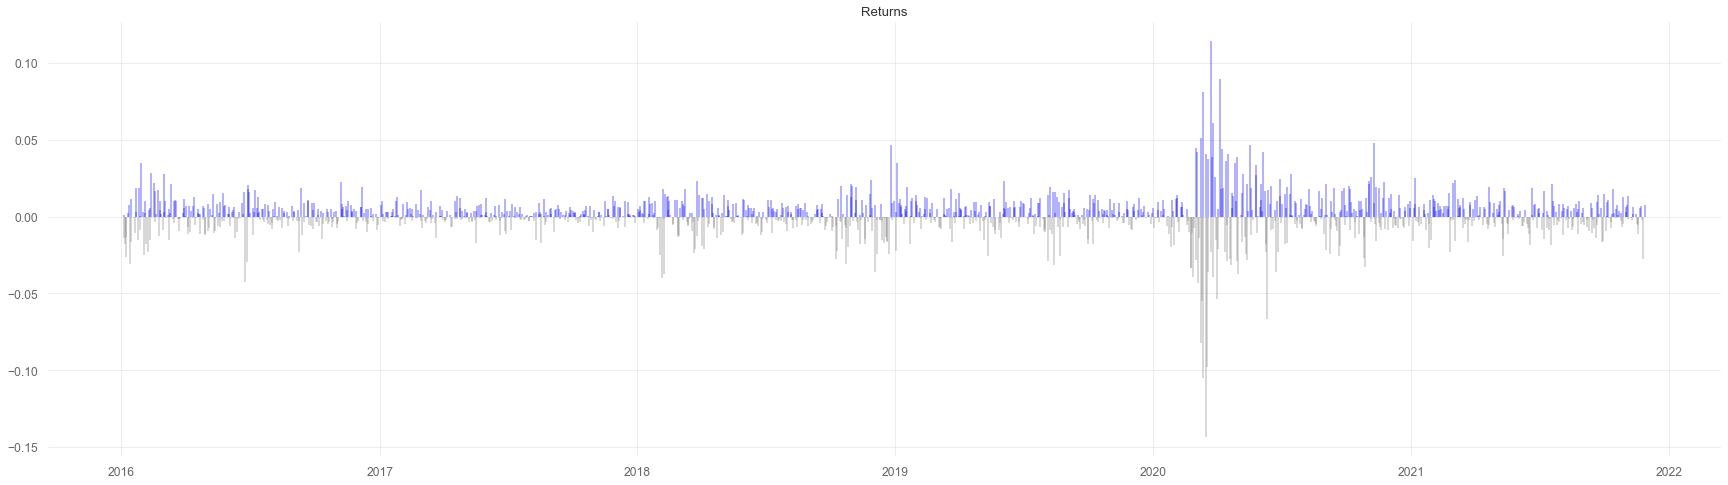

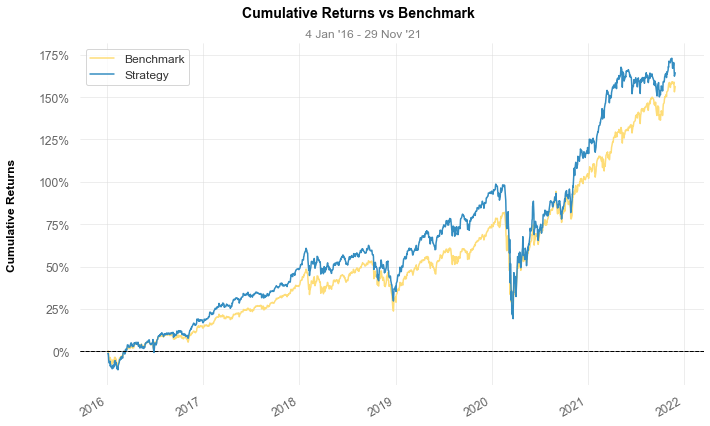

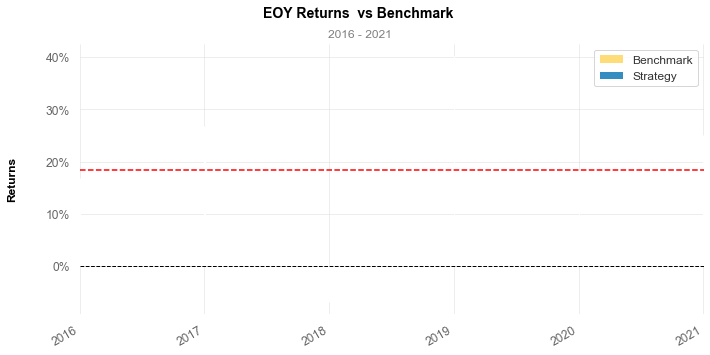

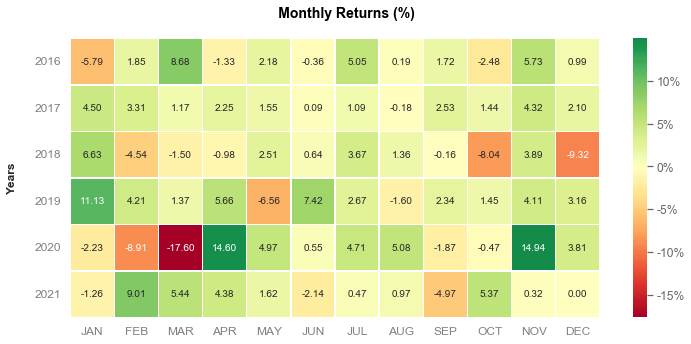

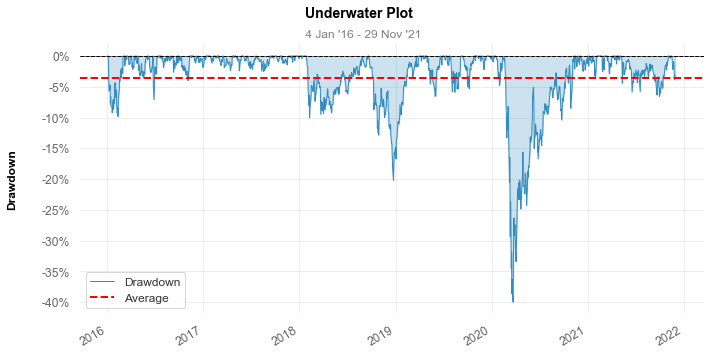

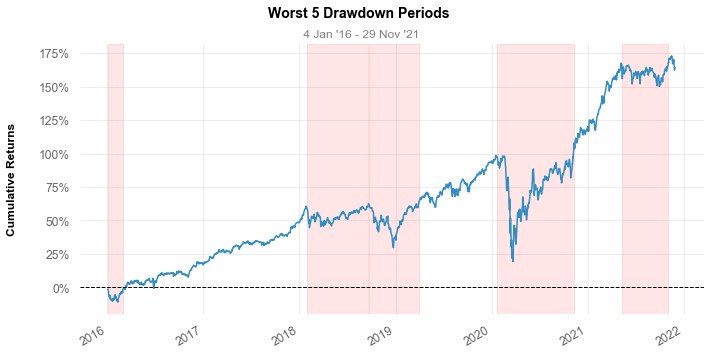

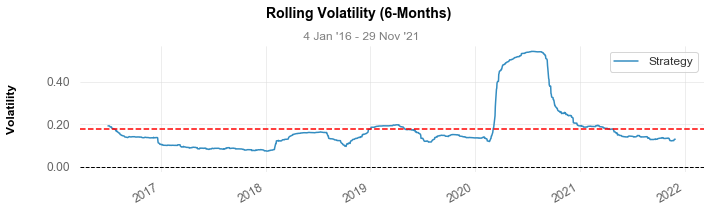

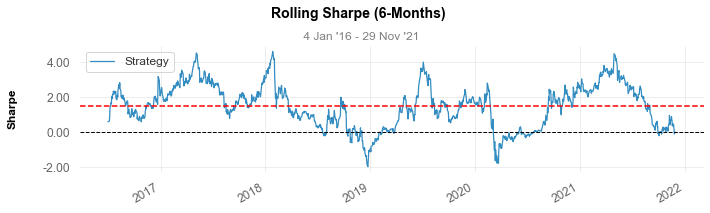

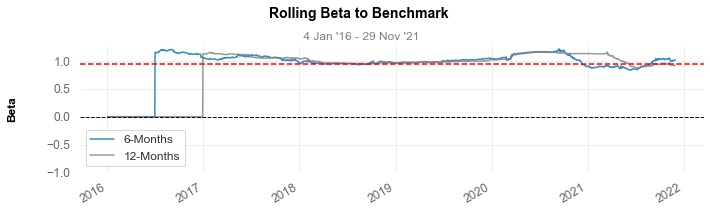

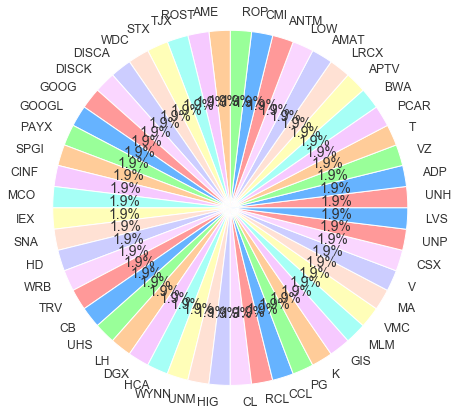

In [94]:
portfolio_test_(closeness_centrality, int(len(g.edges()) - 10))

All

Start date: 2016-01-01
End date: 2021-11-30


Backtest
                             
Annual return           17.2%
Cumulative return     155.56%
Annual volatility     22.09 %
Winning day ratio       54.9%
Sharpe ratio             0.83
Calmar ratio             0.39
Information ratio    0.000000
Stability                0.84
Max Drawdown         -44.01 %
Sortino ratio            1.15
Skew                    -0.84
Kurtosis                21.37
Tail Ratio               0.96
Common sense ratio       1.14
Daily value at risk    -2.0 %
Alpha               -0.010000
Beta                 1.130000

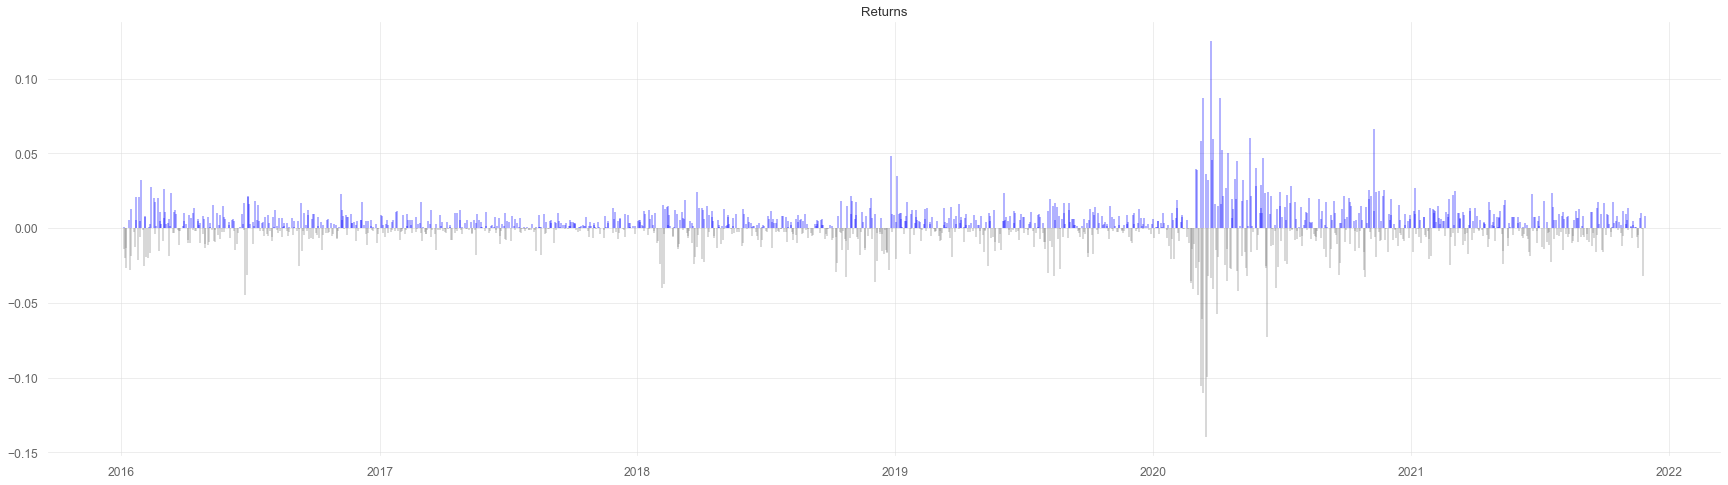

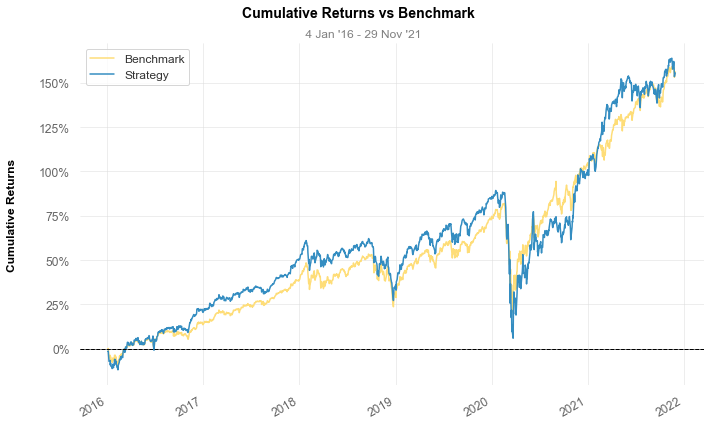

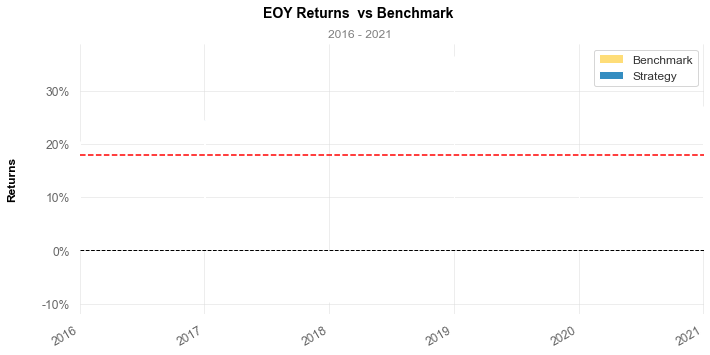

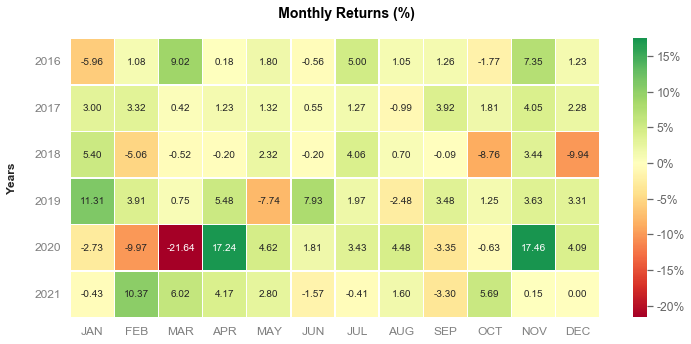

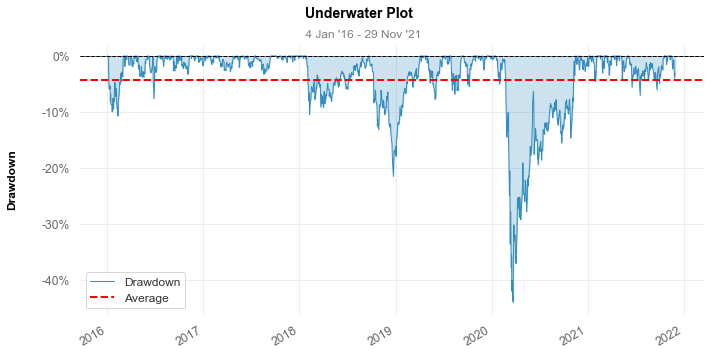

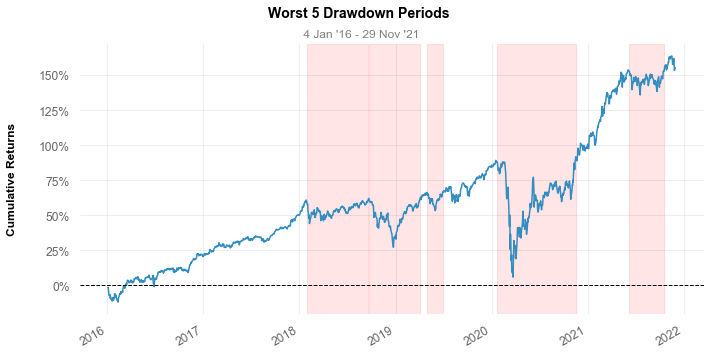

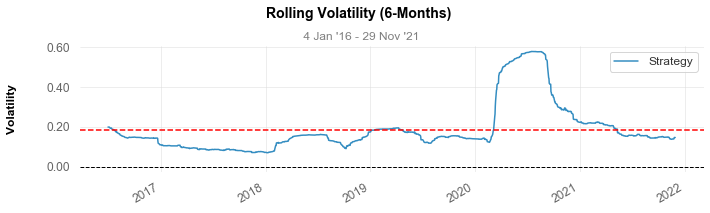

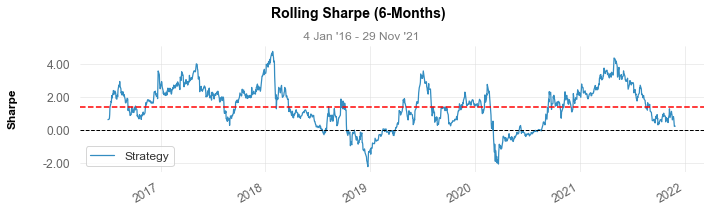

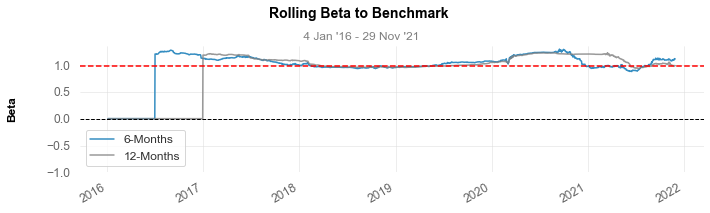

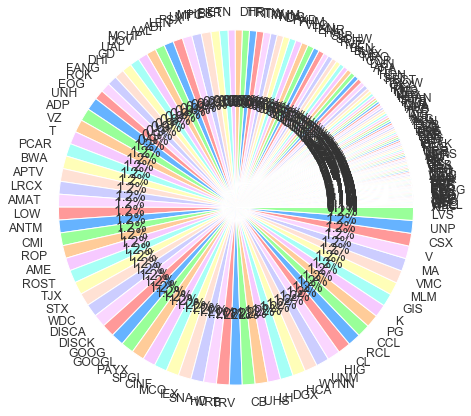

In [95]:
portfolio_test_(closeness_centrality, int(len(g.edges()) - 131))

Top

Start date: 2016-01-01
End date: 2021-11-30


Backtest
                             
Annual return          12.37%
Cumulative return      99.08%
Annual volatility      19.7 %
Winning day ratio      55.91%
Sharpe ratio             0.69
Calmar ratio             0.32
Information ratio   -0.000000
Stability                0.89
Max Drawdown         -38.88 %
Sortino ratio            0.98
Skew                    -0.25
Kurtosis                25.24
Tail Ratio               0.92
Common sense ratio       1.07
Daily value at risk    -2.0 %
Alpha               -0.000000
Beta                 0.790000

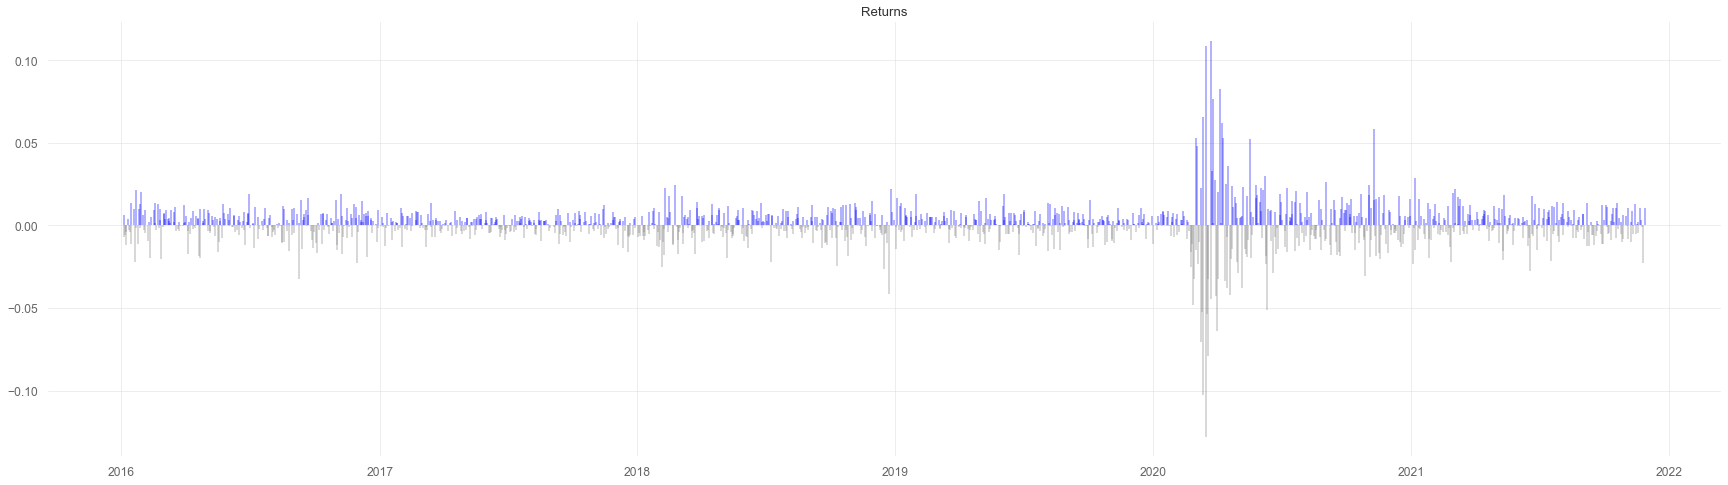

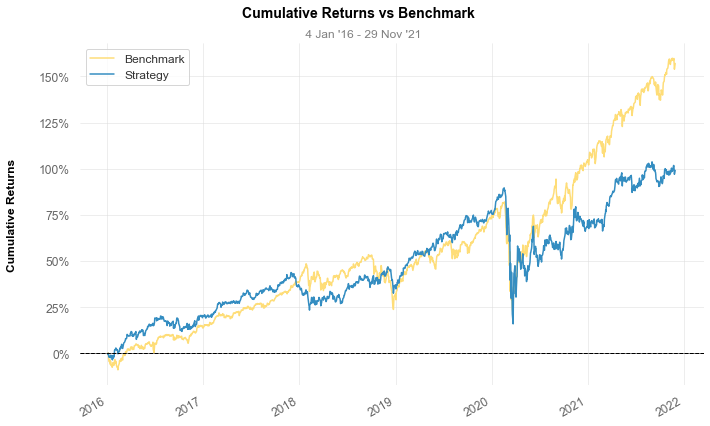

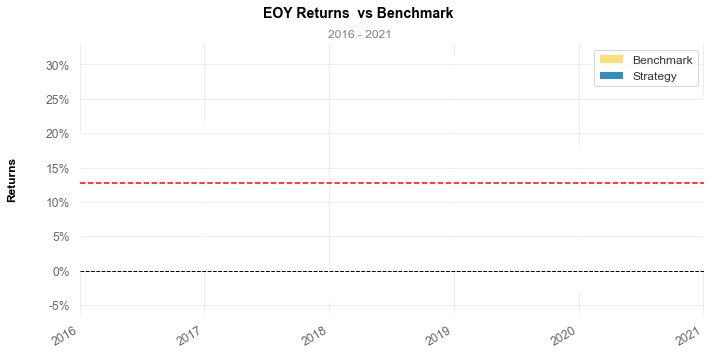

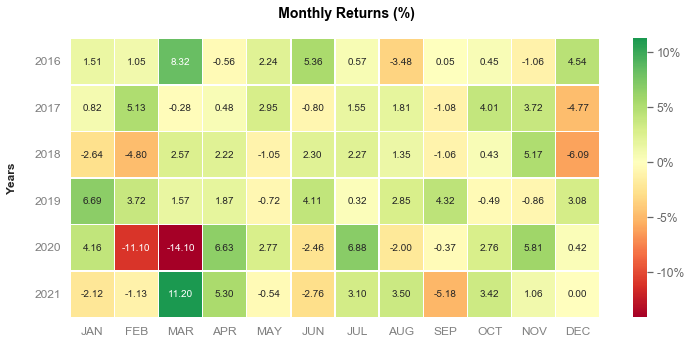

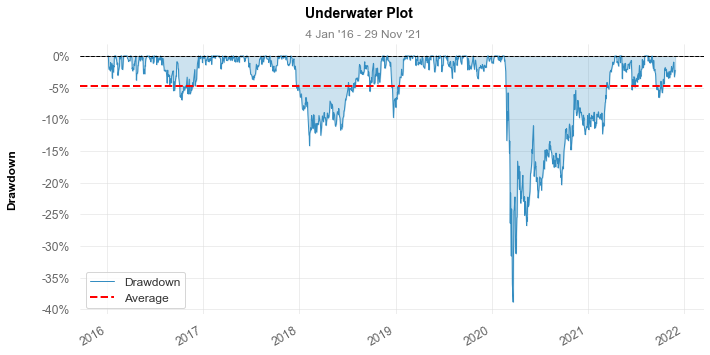

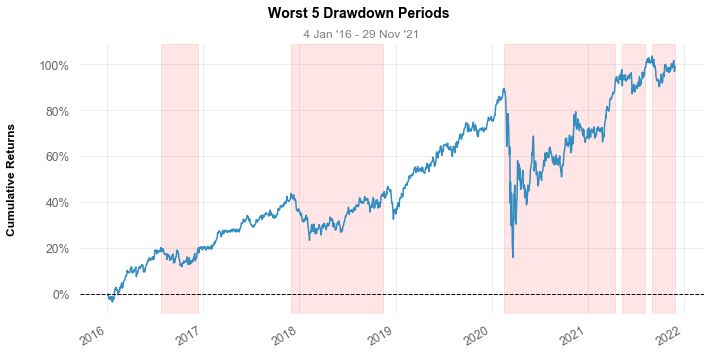

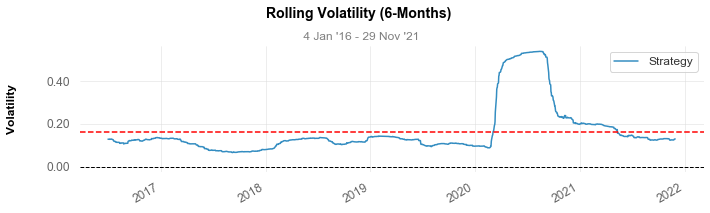

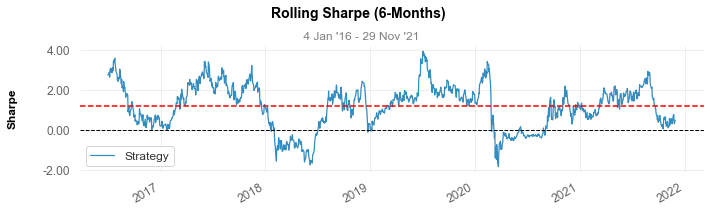

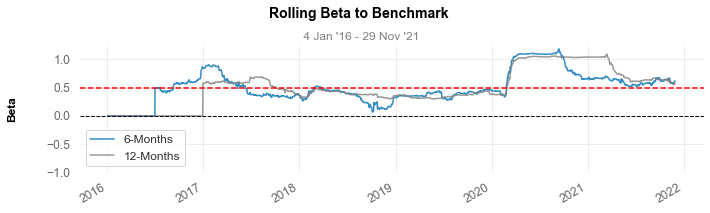

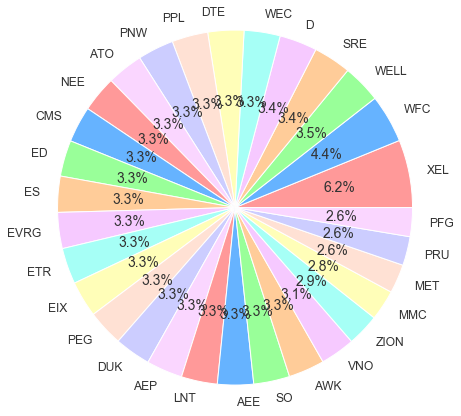

In [97]:
portfolio_test(closeness_centrality, int(len(g.edges()) - 101))

Start date: 2016-01-01
End date: 2021-11-30


Backtest
                             
Annual return          11.18%
Cumulative return      86.93%
Annual volatility      20.0 %
Winning day ratio      55.98%
Sharpe ratio             0.63
Calmar ratio              0.3
Information ratio   -0.000000
Stability                0.88
Max Drawdown         -36.99 %
Sortino ratio            0.89
Skew                    -0.16
Kurtosis                22.71
Tail Ratio               0.95
Common sense ratio       1.08
Daily value at risk    -2.0 %
Alpha                0.000000
Beta                 0.710000

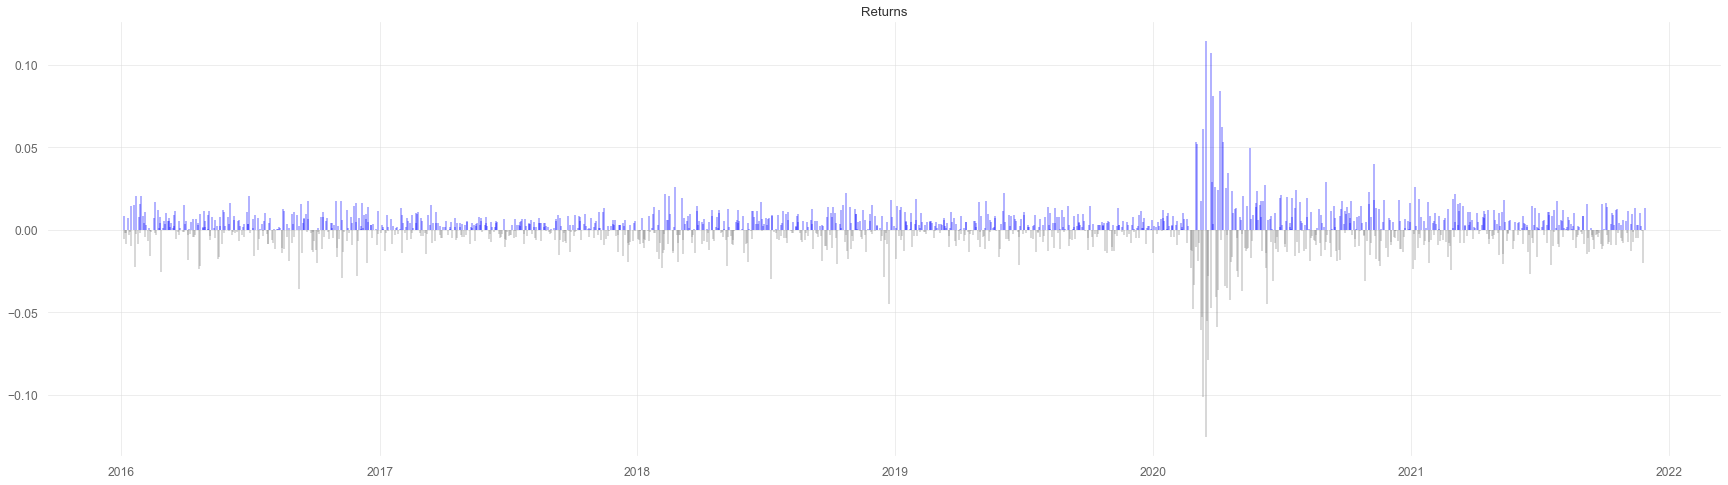

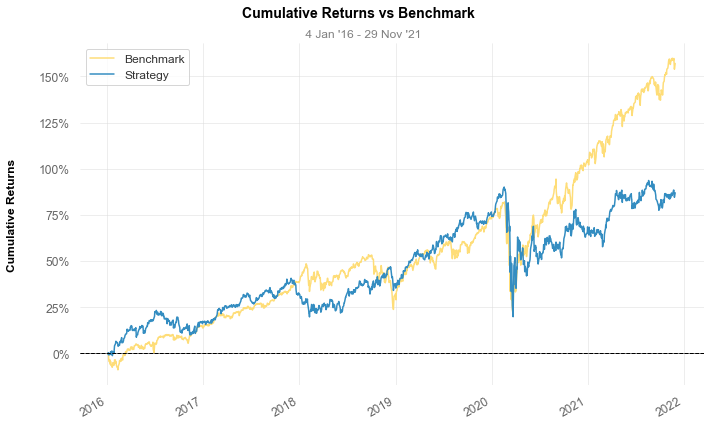

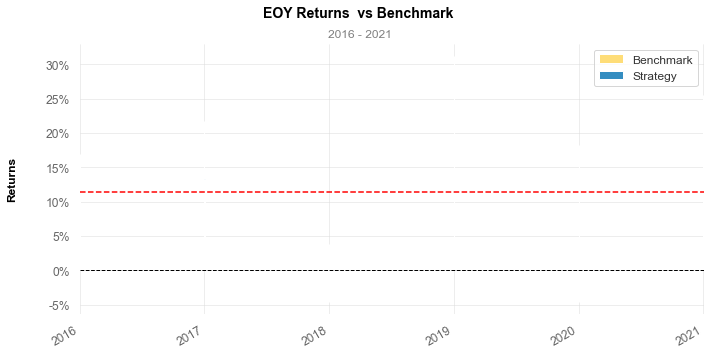

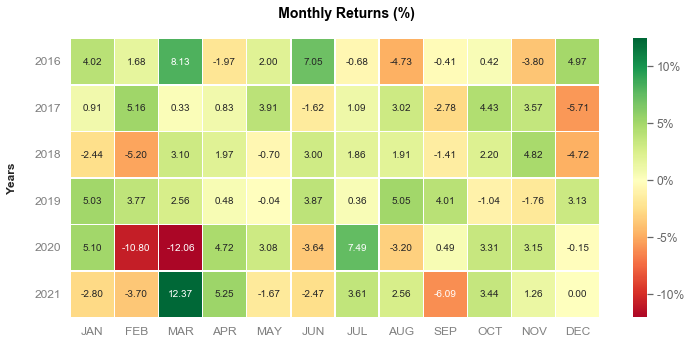

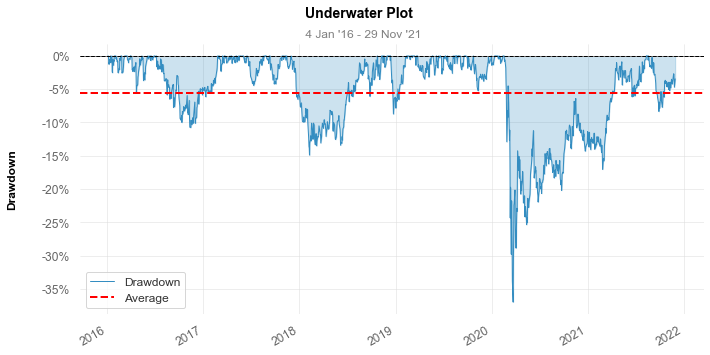

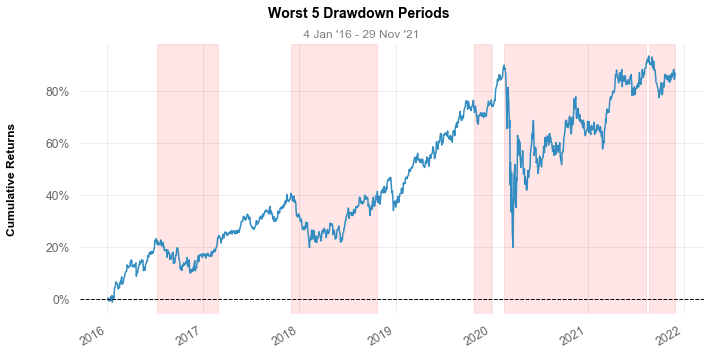

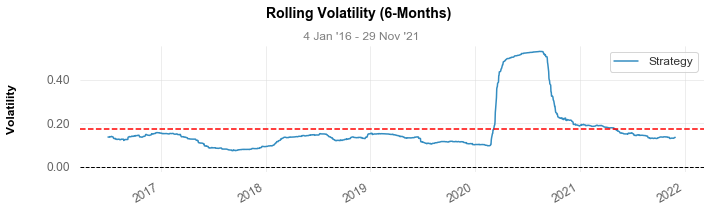

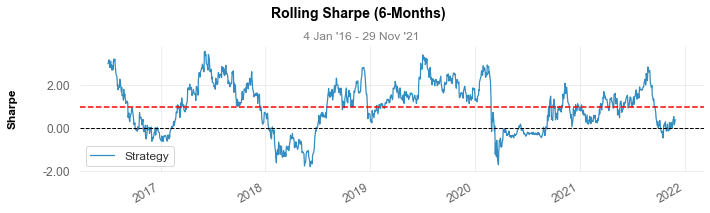

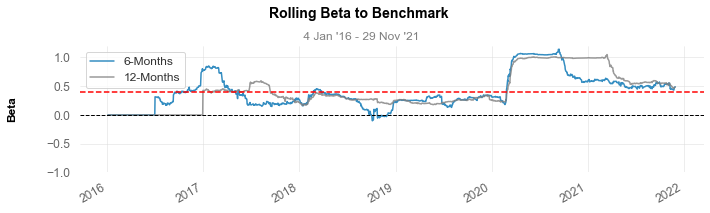

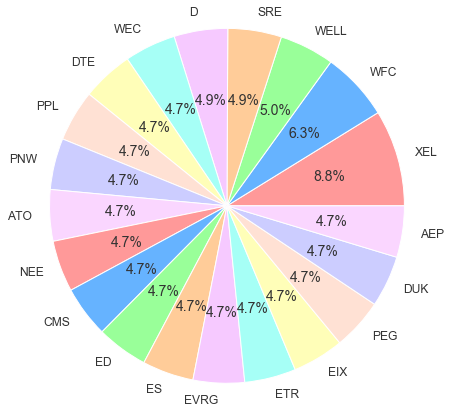

In [98]:
portfolio_test(closeness_centrality, int(len(g.edges()) - 111))

Start date: 2016-01-01
End date: 2021-11-30


Backtest
                             
Annual return            9.6%
Cumulative return      71.79%
Annual volatility     20.46 %
Winning day ratio      56.25%
Sharpe ratio             0.55
Calmar ratio             0.25
Information ratio   -0.000000
Stability                0.82
Max Drawdown         -38.21 %
Sortino ratio            0.77
Skew                     -0.5
Kurtosis                24.68
Tail Ratio               0.98
Common sense ratio        1.1
Daily value at risk    -2.0 %
Alpha               -0.020000
Beta                 0.780000

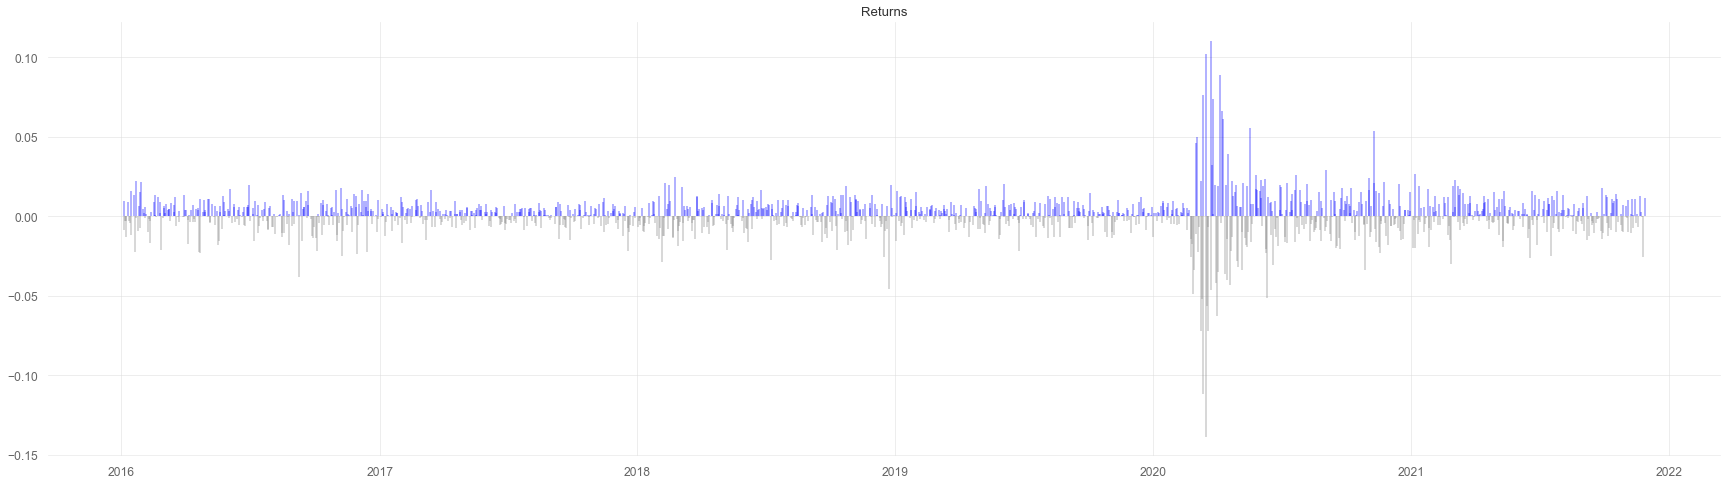

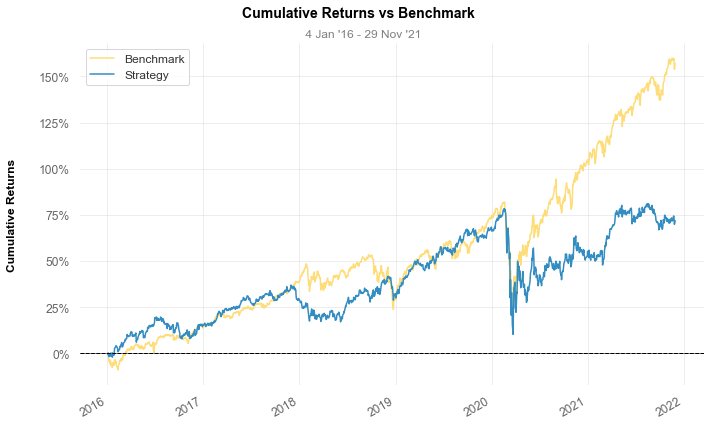

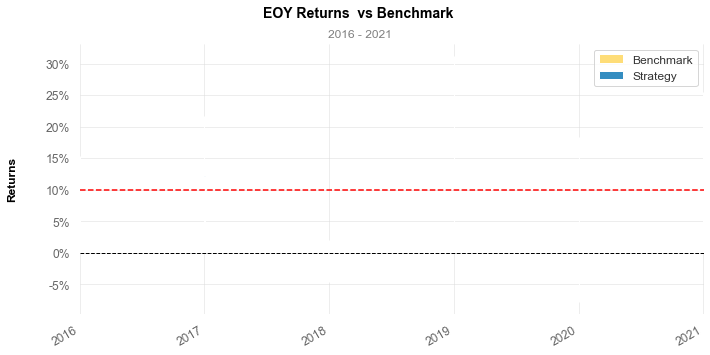

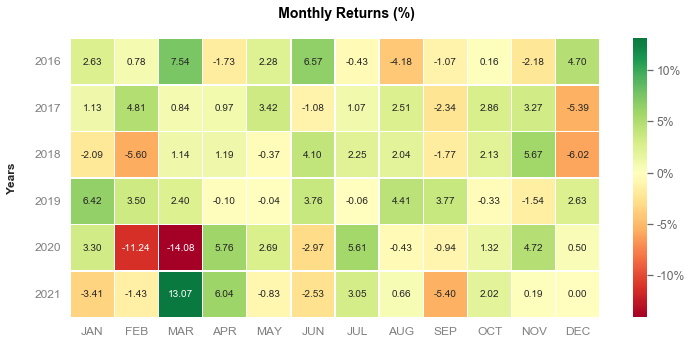

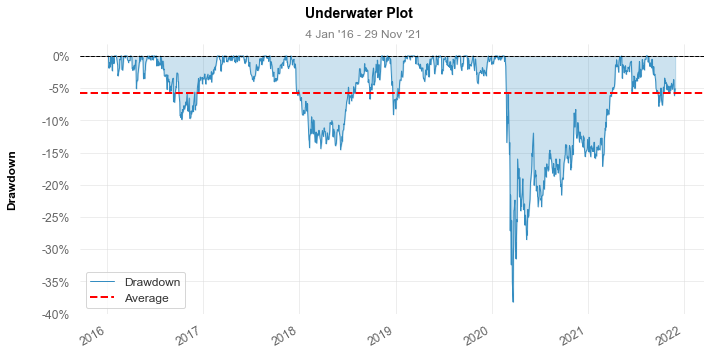

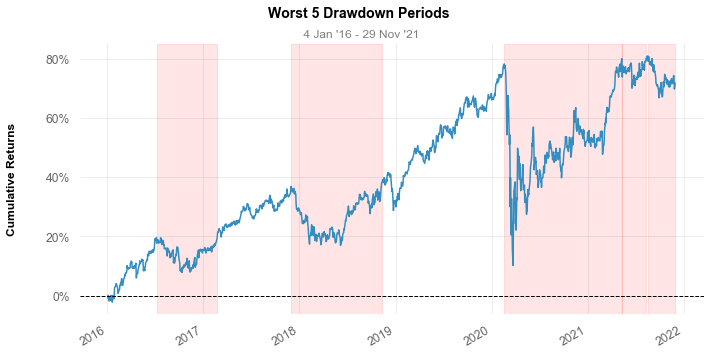

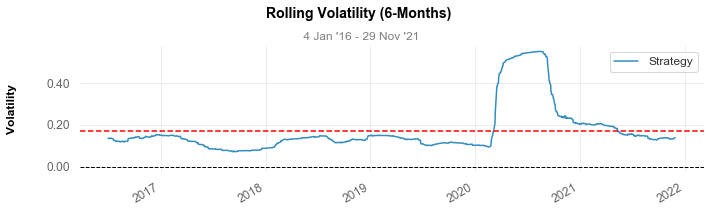

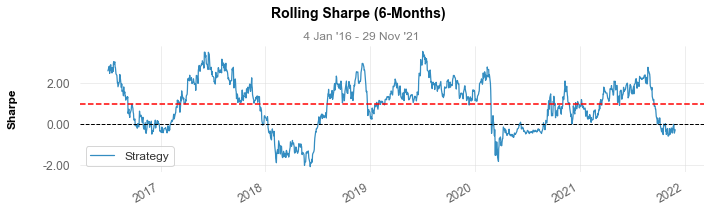

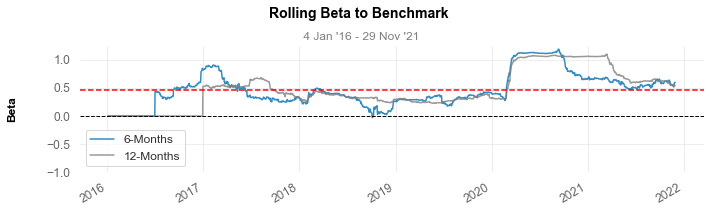

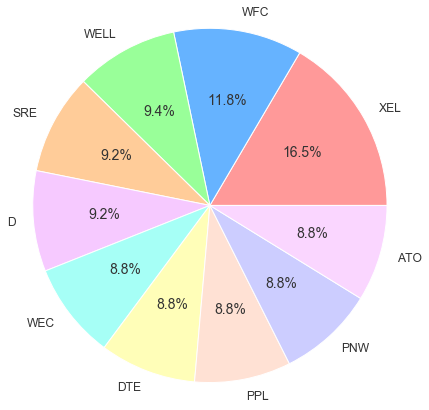

In [99]:
portfolio_test(closeness_centrality, int(len(g.edges()) - 121))

In [ ]:
def optimize(ret,degree,betweenness,closeness):
    w = cp.Variable(3)
    # cd=np.random.uniform(low=-1, high=1,size=(len(train.columns)))
    # cb=np.random.uniform(low=1, high=2,size=(len(train.columns)))
    # cc=np.random.uniform(low=3, high=4,size=(len(train.columns)))
    C = np.vstack([degree[1].to_numpy(),betweenness[1].to_numpy(),closeness[1].to_numpy()])
    mu = calc_Mu(ret).to_numpy()
    C.shape
    # print(cd)

    prob = cp.Problem(cp.Maximize(mu.T@(C.T@w)),[sum(w)==1,w>=0])
    prob.solve()
    # output = {'weights':w.value, 'total_weights':np.sum(w.value),
    #                 'expected_return': mu.dot(w.value), 'std': np.sqrt(w.value.dot(Sigma).dot(w.value)),
    #                 'stocks':np.sum(w.value[:-1]), 'bonds':w.value[-1]}
    return w.value


def allocate(alphas,degree,betweenness,closeness):
  C_avg = (alphas[0]*degree[1] + alphas[1]*betweenness[1] + alphas[2]*closeness[1])

  return C_avg
    # weights = C_avg/C_avg.sum()
  # return weights

def portfolio_test_(df, top):
    df = df.sort_values(1, ascending=False)[top:]
    port1_assets = list(df[0])
    weight = np.array(df[1])
    weight = weight / sum(weight)
    p = Engine(
    start_date = '2016-01-01',
    end_date = '2021-11-30',
    portfolio = port1_assets,
    weights = weight,
    benchmark = ['SPY']
    )

    empyrial(p)

In [96]:
alphas = optimize(returns[betweenness_centrality[0].values], degree_of_centrality, betweenness_centrality, closeness_centrality)
# weights = allocate(alphas,  degree_of_centrality, betweenness_centrality, closeness_centrality)
# weights
# # p = Engine(
# #     start_date = '2016-01-01',
# #     end_date = '2021-12-08',
# #     portfolio = port1_assets,
# #     weights = weights,
# #     benchmark = ['SPY']
# # )

# # empyrial(p)

alphas

array([9.58799710e-11, 1.49344334e-10, 1.00000000e+00])